### Bank Marketing

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

  Term deposits are a major source of income for a bank. A term deposit is a cash investment held at a financial institution. Your money is invested for an agreed rate of interest over a fixed amount of time, or term. The bank has various outreach plans to sell term deposits to their customers such as email marketing, advertisements, telephonic marketing and digital marketing. Telephonic marketing campaigns still remain one of the most effective way to reach out to people. However, they require huge investment as large call centers are hired to actually execute these campaigns. Hence, it is crucial to identify the customers most likely to convert beforehand so that they can be specifically targeted via call.

In [2]:
train_df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset5/main/termdeposit_train.csv')
train_df

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,36483,29,management,single,tertiary,no,0,yes,no,cellular,12,may,116,2,-1,0,unknown,no
31643,40178,53,management,divorced,tertiary,no,380,no,yes,cellular,5,jun,438,2,-1,0,unknown,yes
31644,19710,32,management,single,tertiary,no,312,no,no,cellular,7,aug,37,3,-1,0,unknown,no
31645,38556,57,technician,married,secondary,no,225,yes,no,telephone,15,may,22,7,337,12,failure,no


<b>About The Dataset</b>

The dataset is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal of this dataset is to predict if the client or the customer of polish banking institution will subscribe a term deposit product of the bank or not. 


In [3]:
train_df.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no


In [4]:
train_df.tail()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
31642,36483,29,management,single,tertiary,no,0,yes,no,cellular,12,may,116,2,-1,0,unknown,no
31643,40178,53,management,divorced,tertiary,no,380,no,yes,cellular,5,jun,438,2,-1,0,unknown,yes
31644,19710,32,management,single,tertiary,no,312,no,no,cellular,7,aug,37,3,-1,0,unknown,no
31645,38556,57,technician,married,secondary,no,225,yes,no,telephone,15,may,22,7,337,12,failure,no
31646,14156,55,management,divorced,secondary,no,204,yes,no,cellular,11,jul,1973,2,-1,0,unknown,yes


This dataset contains the details of the customers like

•	ID: Unique client ID
•	age: Age of the client
•	job: Type of job
•	marital: Marital status of the client
•	education: Education level
•	default: Credit in default.
•	housing: Housing loan
•	loan: Personal loan
•	contact: Type of communication
•	month: Contact month
•	day_of_week: Day of week of contact
•	duration: Contact duration
•	campaign: number of contacts performed during this campaign to the client
•	pdays: number of days that passed by after the client was last contacted
•	previous: number of contacts performed before this campaign
•	poutcome: outcome of the previous marketing campaign

The above columns are the features, Based on these features we need to predict the target variable that is Subscribe, whether the customer will subscribe for term deposit or not.

since our target(Subscribe) is a categorical data, we consider this problem as classification Problem.

In [5]:
train_df.shape

(31647, 18)

This dataset Contains 31647 rows and 18 columns.In which 17 are independent variable and 1 target variable.

In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31647 entries, 0 to 31646
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID          31647 non-null  int64 
 1   age         31647 non-null  int64 
 2   job         31647 non-null  object
 3   marital     31647 non-null  object
 4   education   31647 non-null  object
 5   default     31647 non-null  object
 6   balance     31647 non-null  int64 
 7   housing     31647 non-null  object
 8   loan        31647 non-null  object
 9   contact     31647 non-null  object
 10  day         31647 non-null  int64 
 11  month       31647 non-null  object
 12  duration    31647 non-null  int64 
 13  campaign    31647 non-null  int64 
 14  pdays       31647 non-null  int64 
 15  previous    31647 non-null  int64 
 16  poutcome    31647 non-null  object
 17  subscribed  31647 non-null  object
dtypes: int64(8), object(10)
memory usage: 4.3+ MB


We see there are 31647 rows and 18 columns in which 10 are object datatype and 8 are integer data type and we also see there are no null values. Our target is a object datatype we need to encode the object datatype to int.

In [7]:
#We will check for value counts in each column.
for i in train_df.columns:
    print(train_df[i].value_counts(),"\n")
    

26110    1
13339    1
39681    1
15135    1
26037    1
        ..
1247     1
15584    1
25376    1
38699    1
14156    1
Name: ID, Length: 31647, dtype: int64 

32    1457
31    1417
33    1406
34    1321
35    1314
      ... 
92       1
95       1
93       1
94       1
90       1
Name: age, Length: 76, dtype: int64 

blue-collar      6842
management       6639
technician       5307
admin.           3631
services         2903
retired          1574
self-employed    1123
entrepreneur     1008
unemployed        905
housemaid         874
student           635
unknown           206
Name: job, dtype: int64 

married     19095
single       8922
divorced     3630
Name: marital, dtype: int64 

secondary    16224
tertiary      9301
primary       4808
unknown       1314
Name: education, dtype: int64 

no     31062
yes      585
Name: default, dtype: int64 

 0        2470
 1         137
 2         109
 4          95
 3          88
          ... 
 15120       1
-713         1
-905         1
 4722  

In [8]:
## check for unique values
for i in train_df:
    print(str(i), "has", len(train_df[i].unique()), "unique values")

ID has 31647 unique values
age has 76 unique values
job has 12 unique values
marital has 3 unique values
education has 4 unique values
default has 2 unique values
balance has 6326 unique values
housing has 2 unique values
loan has 2 unique values
contact has 3 unique values
day has 31 unique values
month has 12 unique values
duration has 1454 unique values
campaign has 45 unique values
pdays has 509 unique values
previous has 38 unique values
poutcome has 4 unique values
subscribed has 2 unique values


In [9]:
# Check for Null values
train_df.isnull().sum()

ID            0
age           0
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
subscribed    0
dtype: int64

We see there are no null values so, no need to treat nulls. next we will remove unwanted columns in dataset.

In [10]:
## we will drop id column since it is not useful for predicting the data.
train_df.drop('ID', axis = 1, inplace = True)

In [11]:
train_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no


#### Univariate Analysis

In [12]:
train_df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'subscribed'],
      dtype='object')

32    1457
31    1417
33    1406
34    1321
35    1314
      ... 
92       1
95       1
93       1
94       1
90       1
Name: age, Length: 76, dtype: int64


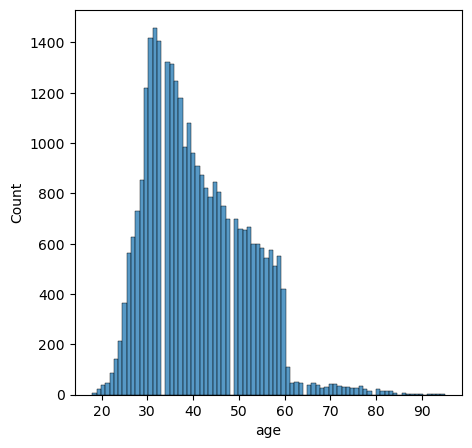

In [13]:
plt.figure(figsize = (5,5))
sns.histplot(train_df['age'])
print(train_df['age'].value_counts())

We see there are more people aged between 30-35 and very less people who are aged above 60.

blue-collar      6842
management       6639
technician       5307
admin.           3631
services         2903
retired          1574
self-employed    1123
entrepreneur     1008
unemployed        905
housemaid         874
student           635
unknown           206
Name: job, dtype: int64


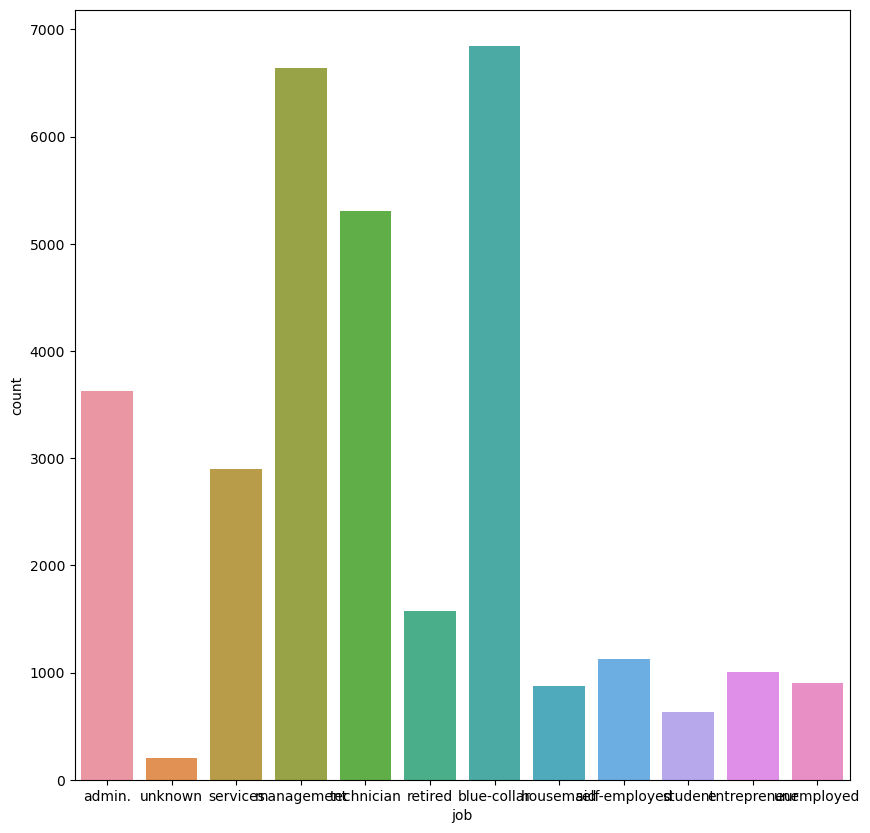

In [14]:
plt.figure(figsize = (10,10))
sns.countplot(x= train_df['job'])
print(train_df['job'].value_counts())

We see there are more people from Blue-collar, management and technician jobs and very less memebers are from unknown job

married     19095
single       8922
divorced     3630
Name: marital, dtype: int64


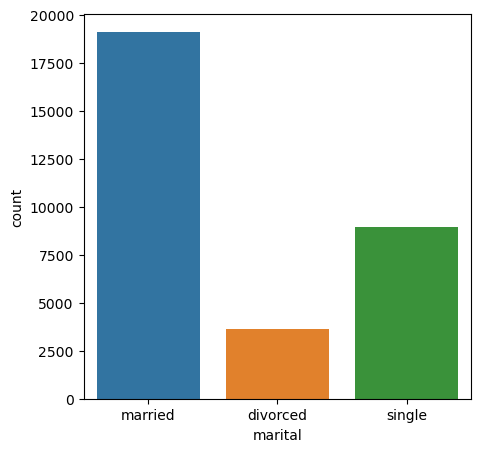

In [15]:
plt.figure(figsize = (5,5))
sns.countplot(x= 'marital', data=train_df)
print(train_df['marital'].value_counts())

We see there are more members who are married and less are divorced and singles are little higher than the divorced.

secondary    16224
tertiary      9301
primary       4808
unknown       1314
Name: education, dtype: int64


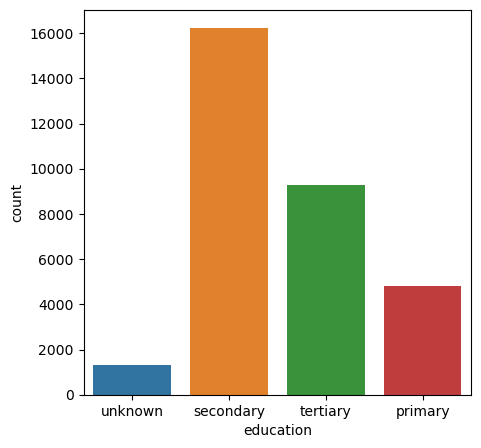

In [16]:
plt.figure(figsize = (5,5))
sns.countplot(train_df['education'])
print(train_df['education'].value_counts())

We see most of them are having secondary education, few members are having primary education and compared to primary there is high number of people from teritary education, And also some of the members education is unknown

no     31062
yes      585
Name: default, dtype: int64


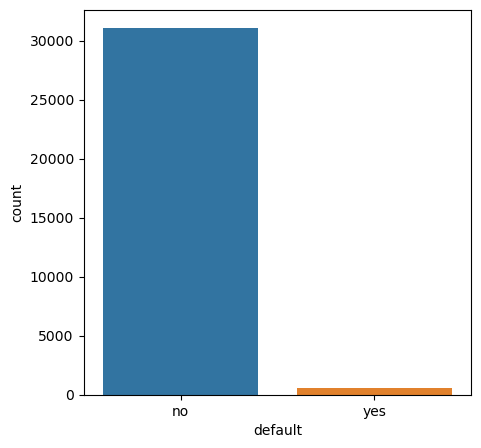

In [17]:
plt.figure(figsize = (5,5))
sns.countplot(train_df['default'])
print(train_df['default'].value_counts())

We see there are 31000 members who does not have credit and around 600 members are having default credit.

 0        2470
 1         137
 2         109
 4          95
 3          88
          ... 
 15120       1
-713         1
-905         1
 4722        1
 2968        1
Name: balance, Length: 6326, dtype: int64


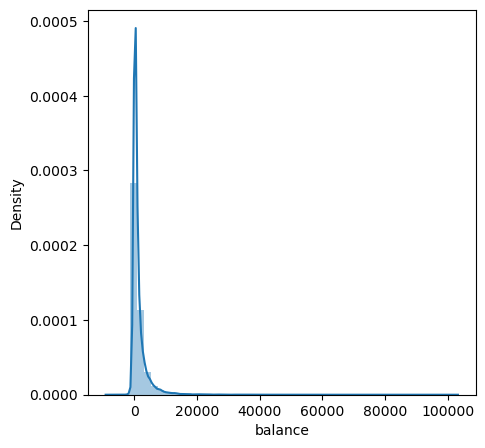

In [18]:
plt.figure(figsize = (5,5))
sns.distplot(train_df['balance'])
print(train_df['balance'].value_counts())

yes    17584
no     14063
Name: housing, dtype: int64


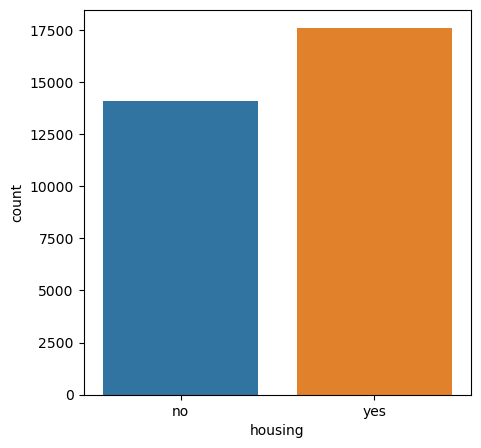

In [19]:
plt.figure(figsize = (5,5))
sns.countplot(train_df['housing'])
print(train_df['housing'].value_counts())

We see 17500 people are having housing loan and 14000 people does not have housing loan.

no     26516
yes     5131
Name: loan, dtype: int64


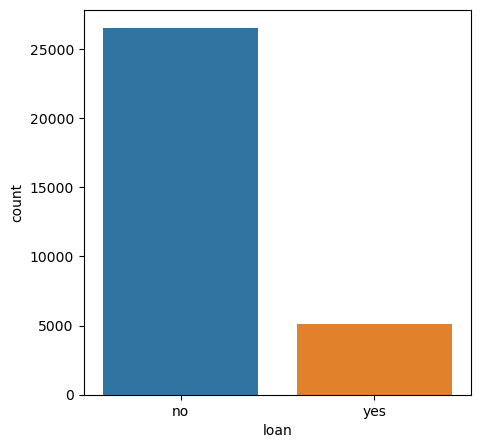

In [20]:
plt.figure(figsize = (5,5))
sns.countplot(train_df['loan'])
print(train_df['loan'].value_counts())

We see more members does not have personal loan and may be some 15% of people are having personal loan.

cellular     20423
unknown       9177
telephone     2047
Name: contact, dtype: int64


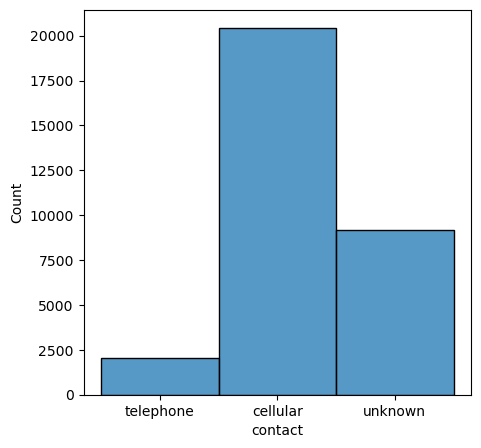

In [21]:
plt.figure(figsize = (5,5))
sns.histplot(train_df['contact'])
print(train_df['contact'].value_counts())

We see more people were contacted through cellulars and some of the members through telephone and around 8000 members mode of contact is unknown.

20    1909
18    1612
21    1445
5     1373
6     1348
17    1344
14    1283
8     1281
28    1276
29    1241
7     1240
19    1228
15    1208
12    1116
13    1099
9     1097
30    1082
4     1016
11    1014
16     981
2      900
27     804
3      761
26     761
23     657
22     640
25     586
31     460
10     360
24     305
1      220
Name: day, dtype: int64


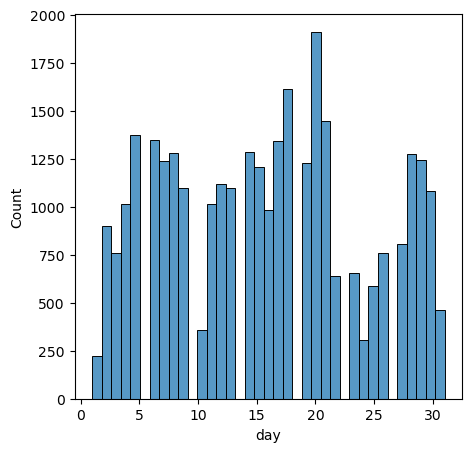

In [22]:
plt.figure(figsize = (5,5))
sns.histplot(train_df['day'])
print(train_df['day'].value_counts())

Most of the people were contacted between 17th to 20th day and very few were contacted on 1st day.

may    9669
jul    4844
aug    4333
jun    3738
nov    2783
apr    2055
feb    1827
jan     977
oct     512
sep     410
mar     342
dec     157
Name: month, dtype: int64


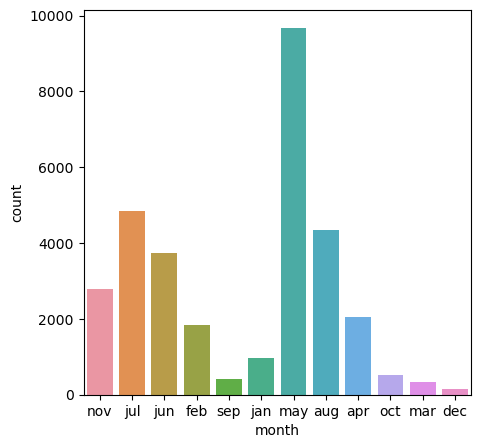

In [23]:
plt.figure(figsize = (5,5))
sns.countplot(train_df['month'])
print(train_df['month'].value_counts())

We see most of them were contacted in the months of may, june, july and august and very few were contacted in december

90      135
124     130
139     127
88      127
104     127
       ... 
1405      1
1090      1
1261      1
1218      1
1973      1
Name: duration, Length: 1454, dtype: int64


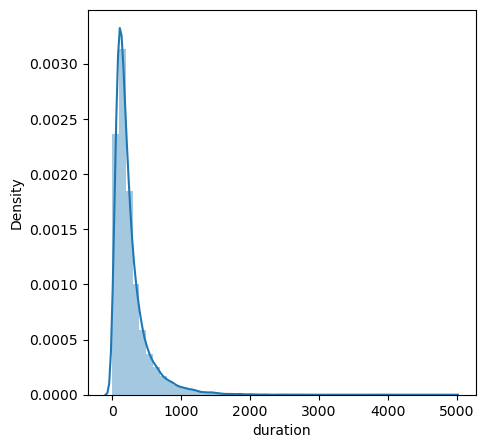

In [24]:
plt.figure(figsize = (5,5))
sns.distplot(train_df['duration'])
print(train_df['duration'].value_counts())

1     12262
2      8798
3      3858
4      2442
5      1245
6       916
7       518
8       356
9       236
10      184
11      126
12      102
13       93
14       68
15       61
16       54
17       52
20       37
18       37
19       30
21       19
22       18
25       17
28       14
23       13
24       13
29       12
26        9
31        9
27        8
30        6
32        6
33        5
34        5
43        3
35        3
38        3
37        2
63        1
41        1
50        1
55        1
44        1
36        1
39        1
Name: campaign, dtype: int64


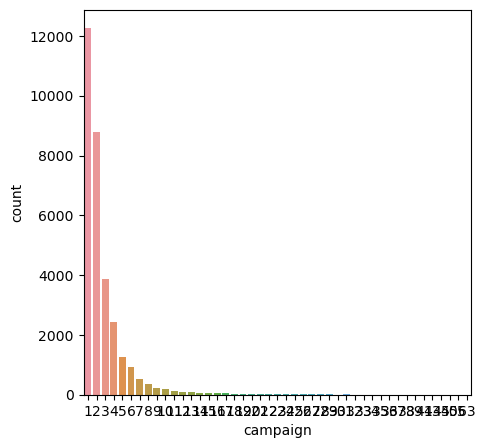

In [25]:
plt.figure(figsize = (5,5))
sns.countplot(train_df['campaign'])
print(train_df['campaign'].value_counts())

We see huge number of contacts were performed in the starting few days of campaign, later on the number off contacts were reduced in the campaign.

-1      25924
 182      118
 92       100
 91        87
 183       85
        ...  
 51         1
 20         1
 25         1
 526        1
 382        1
Name: pdays, Length: 509, dtype: int64


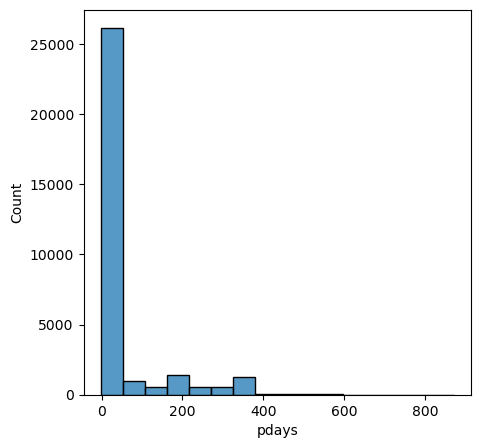

In [26]:
plt.figure(figsize = (5,5))
sns.histplot(train_df['pdays'])
print(train_df['pdays'].value_counts())

We see that around 25000 members are having less than one day that passed by after the client was last contacted, may be these members were contacted before the campaign.

0      25924
1       1921
2       1481
3        780
4        501
5        311
6        188
7        138
8         81
9         64
10        49
11        46
13        30
12        30
15        15
14        14
17        11
16         8
19         8
23         6
18         5
20         5
21         4
22         4
25         4
27         4
26         2
29         2
24         2
275        1
28         1
32         1
30         1
38         1
58         1
35         1
41         1
37         1
Name: previous, dtype: int64


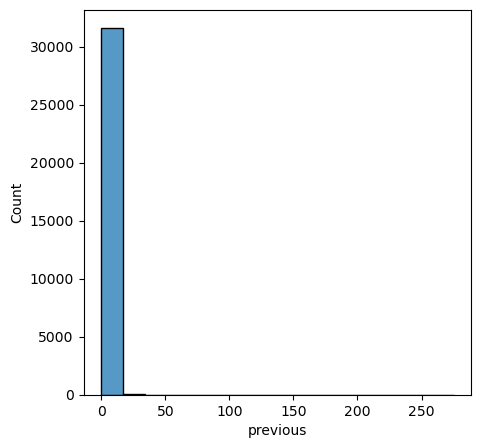

In [27]:
plt.figure(figsize = (5,5))
sns.histplot(train_df['previous'])
print(train_df['previous'].value_counts())

We see that 25924 members were contacted before the campaign.

unknown    25929
failure     3362
other       1288
success     1068
Name: poutcome, dtype: int64


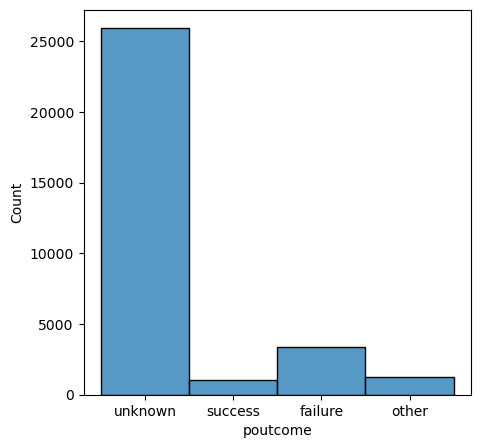

In [28]:
plt.figure(figsize = (5,5))
sns.histplot(train_df['poutcome'])
print(train_df['poutcome'].value_counts())

we see that since 25000 members were contacted before the campaign there outcomes are unknown and Failures are high compared to success and other reasons.

no     27932
yes     3715
Name: subscribed, dtype: int64


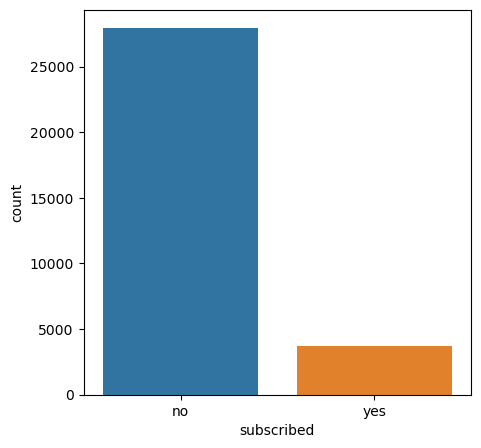

In [29]:
plt.figure(figsize = (5,5))
sns.countplot(train_df['subscribed'])
print(train_df['subscribed'].value_counts())

We see that 27000 members doesnot subscribe for the term deposit and only 4000 members are accepted for term deposit.

In [30]:
train_df.dtypes

age            int64
job           object
marital       object
education     object
default       object
balance        int64
housing       object
loan          object
contact       object
day            int64
month         object
duration       int64
campaign       int64
pdays          int64
previous       int64
poutcome      object
subscribed    object
dtype: object

#### Bivariate Analysis

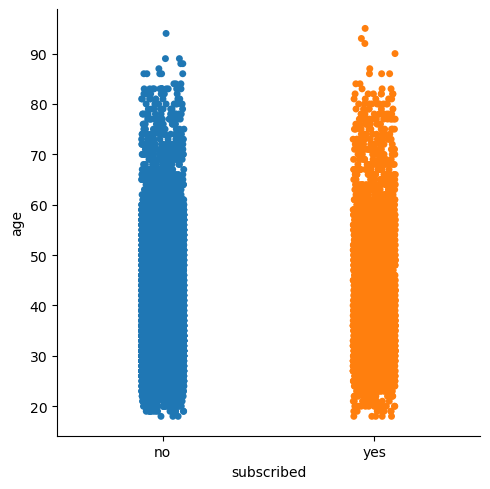

In [31]:
sns.catplot(x='subscribed', y='age',data = train_df, kind='strip')
plt.show()

Here we see there is no change in length of subscribers, so there are both subscribers and non-subscribers in all ages.

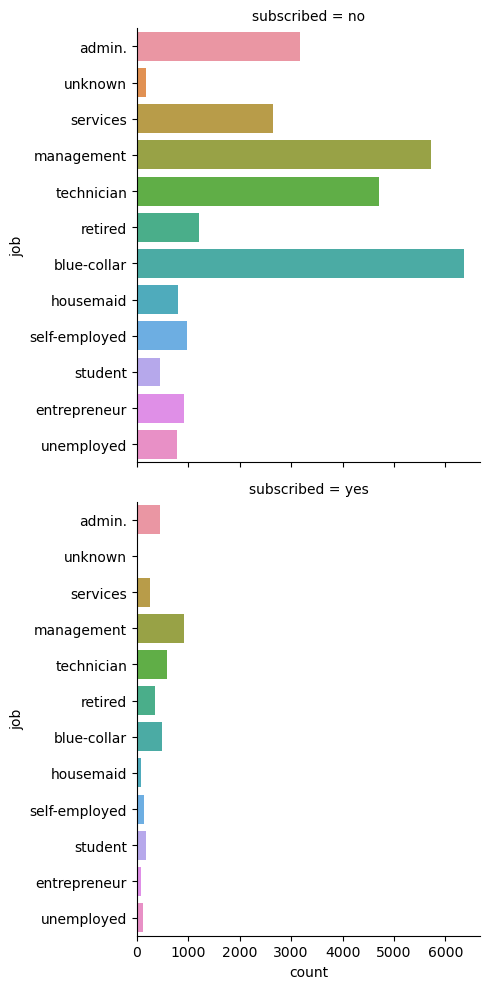

In [32]:
sns.catplot(y='job', row ='subscribed',data = train_df, kind='count')
plt.show()

We see there are more memebers with bluecollar and management jobs butthey are also high in not subscribing the term deposit, and we see there are more subscribers from management and technicians, housemaids have less subscribers.

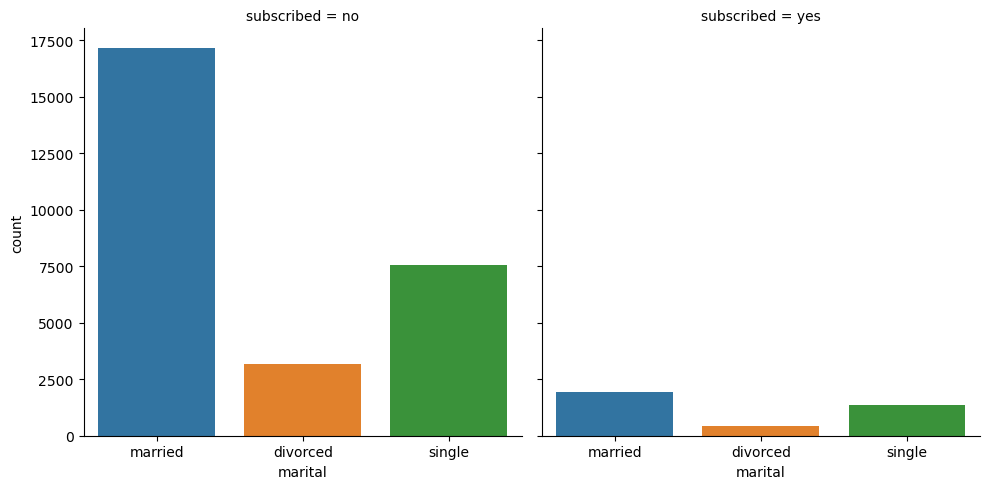

In [33]:
sns.catplot(x='marital', col ='subscribed', data = train_df, kind='count')
plt.show()

we see there are more married who have subscribed and also not subscribed. 

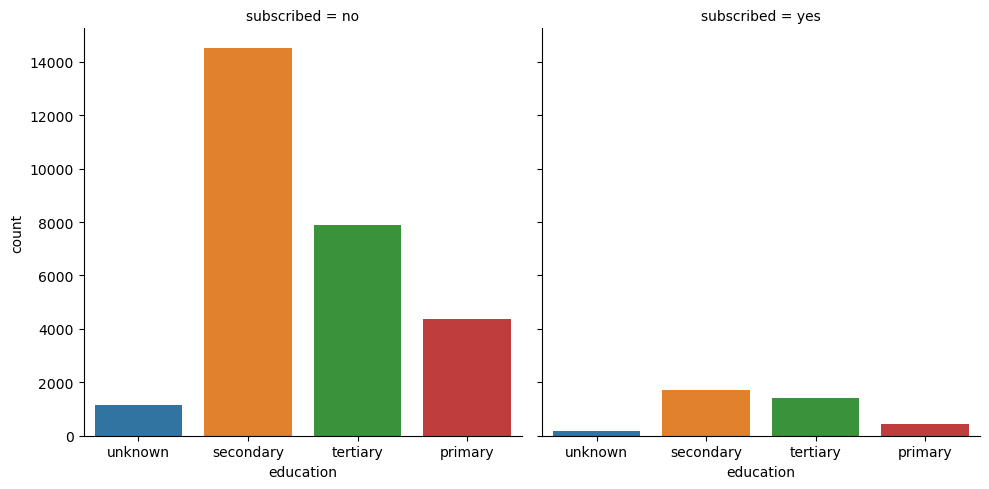

In [34]:
sns.catplot(x='education', col ='subscribed', data = train_df, kind='count')
plt.show()

We see there are secondary educated members with high subscribers and memebers whose education is unknown have least subscription

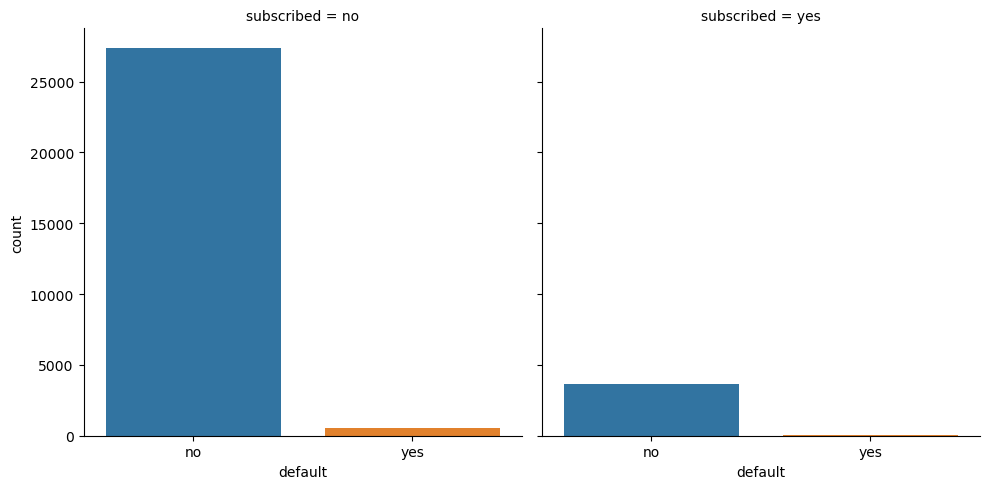

In [35]:
sns.catplot(x='default', col ='subscribed', data = train_df, kind='count')
plt.show()

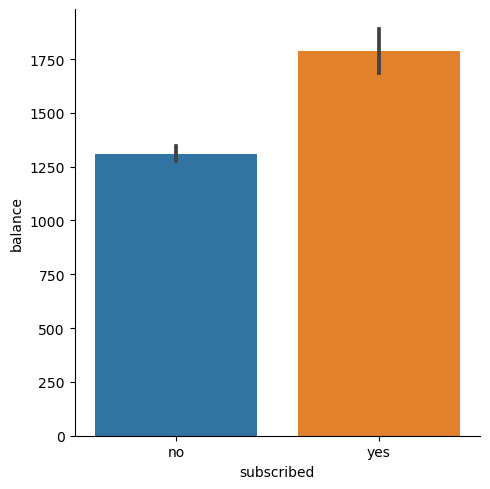

In [36]:
sns.catplot(y='balance', x ='subscribed', data = train_df, kind='bar')
plt.show()

we see who have higher credit balance they are getting subscribed

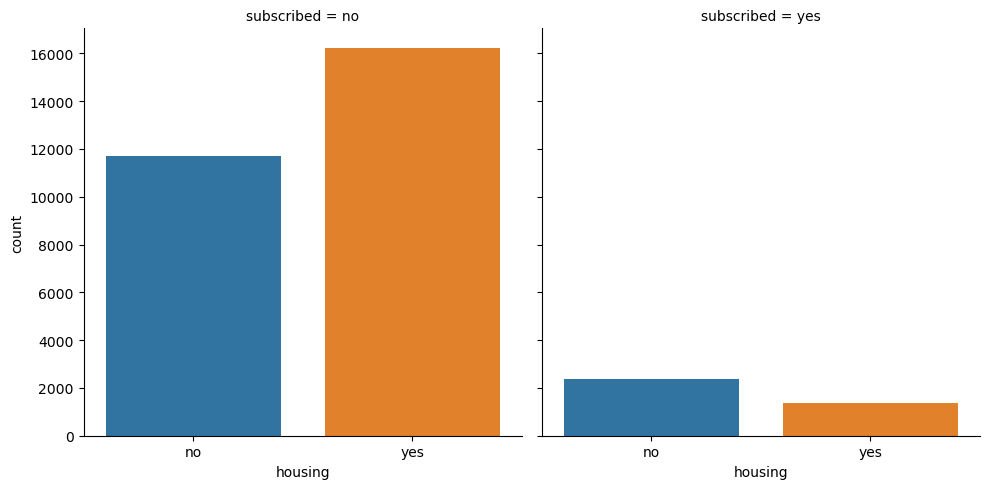

In [37]:
sns.catplot(x='housing', col ='subscribed', data = train_df, kind='count')
plt.show()

we see most of them who have housing loan are not getting subscribed.

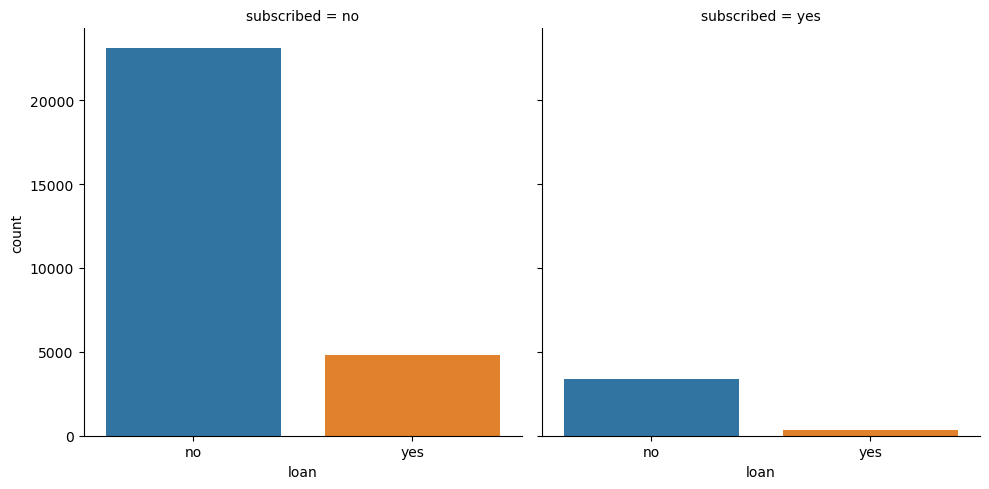

In [38]:
sns.catplot(x='loan', col ='subscribed', data = train_df, kind='count')
plt.show()

we see most of them who dont have any loan they are getting subscribed compared to non-subscribers.

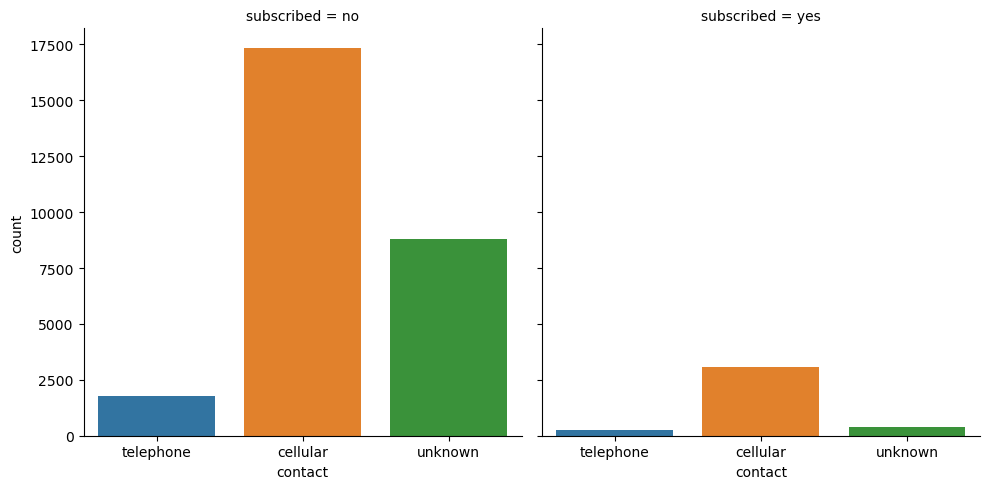

In [39]:
sns.catplot(x='contact', col ='subscribed', data = train_df, kind='count')
plt.show()

we see those who had cellular contact there subscription is high compared to telephone and other modes.

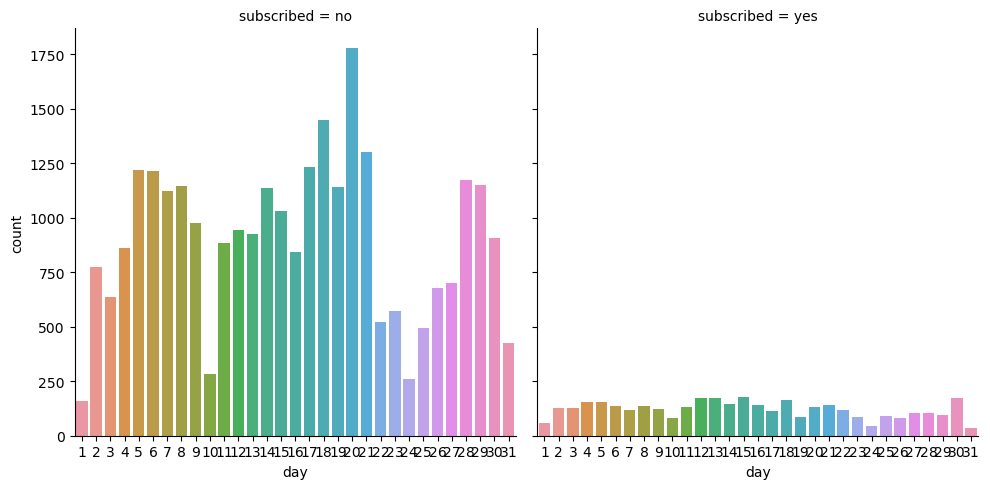

In [40]:
sns.catplot(x='day', col ='subscribed', data = train_df, kind='count')
plt.show()

We see there are more subscribers on 12, 13 15 and 30th days.We also see that there are more non-subscribers on 18,20 and 21 days.

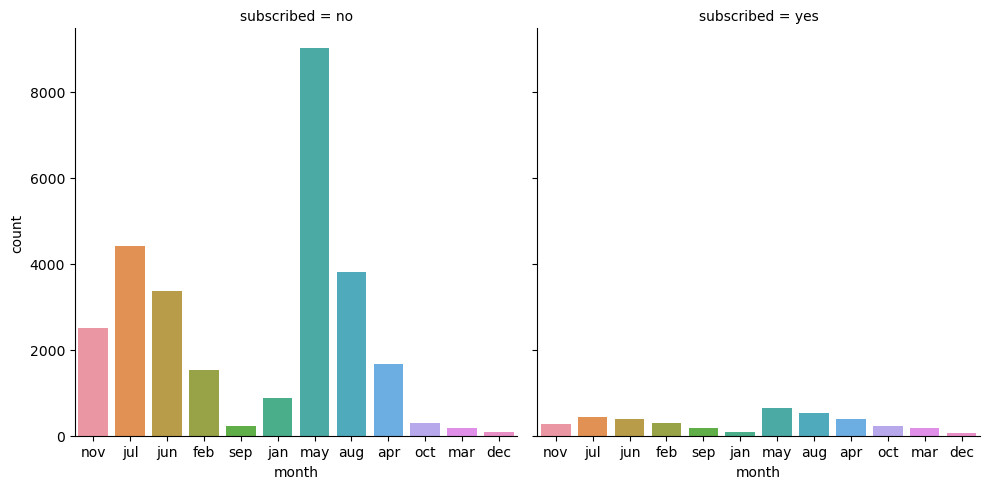

In [41]:
sns.catplot(x='month', col ='subscribed', data = train_df, kind='count')
plt.show()

Since we have huge data on may, june, july, august month we see that all these months has both highest non-subscribers and also subbscribers

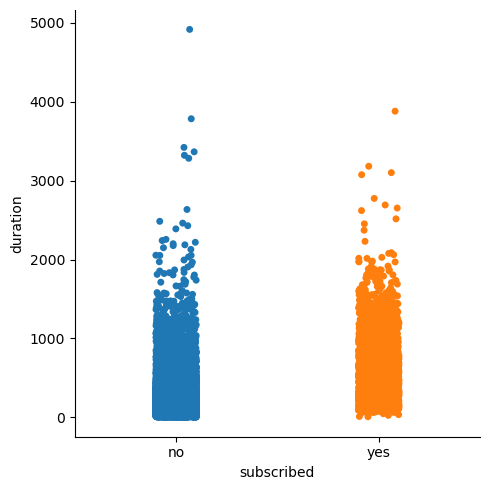

In [42]:
sns.catplot(x='subscribed', y ='duration', data = train_df, kind='strip')
plt.show()

we see there is outliers in duration we also see that non-subscribers contact duration is from 0 days itself whereas subscribers have 1 or 2 days difference. we see duration for non-subscribers reduces after 1500.

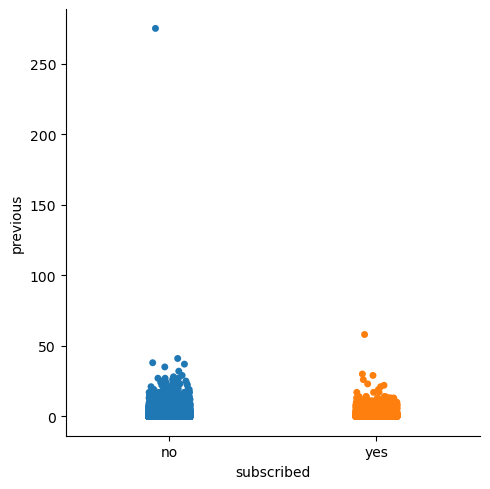

In [43]:
sns.catplot(y ='previous', x ='subscribed', data = train_df, kind='strip')
plt.show()

We see with the high non-subscribers with number of contacts performed before this campaign

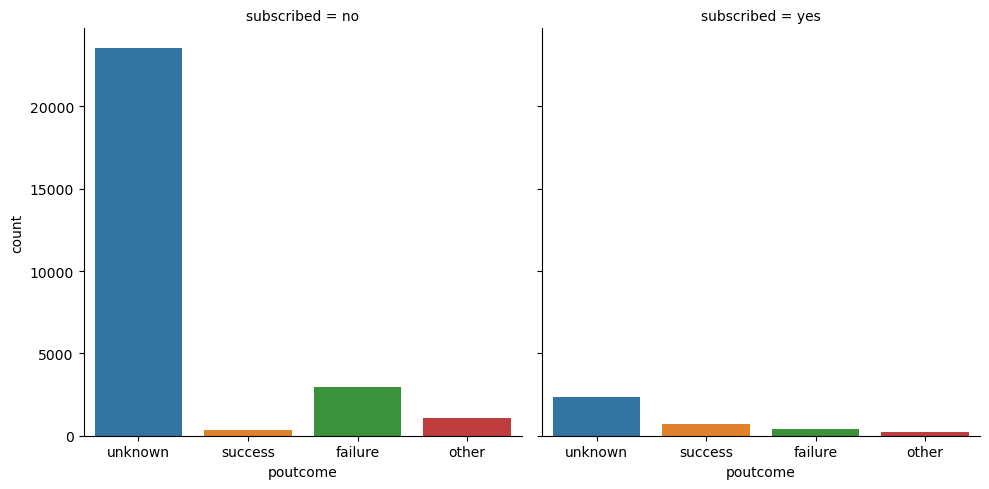

In [44]:
sns.catplot(x ='poutcome', col ='subscribed', data = train_df, kind='count')
plt.show()

We see more subscription from those whose previous outcomes was unknown.

#### Now, We will convert object data to int data using encoding techniques.

In [45]:
from sklearn.preprocessing import LabelEncoder

In [46]:
le = LabelEncoder()
for i in train_df.columns:
    if train_df[i].dtypes == 'object':
        train_df[i] = le.fit_transform(train_df[i])
train_df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,56,0,1,3,0,1933,0,0,1,19,9,44,2,-1,0,3,0
1,31,11,1,1,0,3,0,0,0,20,5,91,2,-1,0,3,0
2,27,7,1,1,0,891,1,0,0,18,5,240,1,-1,0,3,0
3,57,4,0,2,0,3287,0,0,0,22,6,867,1,84,3,2,1
4,31,9,1,1,0,119,1,0,0,4,3,380,1,-1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,29,4,2,2,0,0,1,0,0,12,8,116,2,-1,0,3,0
31643,53,4,0,2,0,380,0,1,0,5,6,438,2,-1,0,3,1
31644,32,4,2,2,0,312,0,0,0,7,1,37,3,-1,0,3,0
31645,57,9,1,1,0,225,1,0,1,15,8,22,7,337,12,0,0


In [47]:
train_df.dtypes

age           int64
job           int32
marital       int32
education     int32
default       int32
balance       int64
housing       int32
loan          int32
contact       int32
day           int64
month         int32
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome      int32
subscribed    int32
dtype: object

Now, we have converted to integer values so we will check for the correlation.

In [48]:
#next we need to check with the correlation 
train_df.corr()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
age,1.000000,-0.020765,-0.406024,-0.102356,-0.016117,0.103245,-0.183775,-0.012657,0.026733,-0.011056,-0.038368,-0.003870,0.005733,-0.021947,0.005761,0.006466,0.024538
job,-0.020765,1.000000,0.066124,0.170347,-0.005217,0.020638,-0.125347,-0.039049,-0.078253,0.020951,-0.089384,0.002694,0.001469,-0.022552,-0.003032,0.007101,0.038921
marital,-0.406024,0.066124,1.000000,0.107547,-0.009591,0.003487,-0.017846,-0.041654,-0.040180,-0.007686,-0.003834,0.011544,-0.009394,0.019741,0.012717,-0.019770,0.046043
education,-0.102356,0.170347,0.107547,1.000000,-0.006774,0.065176,-0.095376,-0.045950,-0.112000,0.017902,-0.055967,0.003842,0.006142,-0.001566,0.015280,-0.019007,0.066051
default,-0.016117,-0.005217,-0.009591,-0.006774,1.000000,-0.069422,-0.011823,0.081567,0.014053,0.009996,0.004694,-0.010849,0.018538,-0.029622,-0.015877,0.035067,-0.020168
balance,0.103245,0.020638,0.003487,0.065176,-0.069422,1.000000,-0.067466,-0.083631,-0.024083,0.003461,0.023056,0.024274,-0.012032,0.001789,0.013843,-0.019629,0.050807
housing,-0.183775,-0.125347,-0.017846,-0.095376,-0.011823,-0.067466,1.000000,0.036244,0.195103,-0.025666,0.271442,0.003021,-0.021076,0.118790,0.034231,-0.092677,-0.141092
loan,-0.012657,-0.039049,-0.041654,-0.045950,0.081567,-0.083631,0.036244,1.000000,-0.009213,0.014769,0.024186,-0.012781,0.009340,-0.020078,-0.009258,0.010919,-0.072266
contact,0.026733,-0.078253,-0.040180,-0.112000,0.014053,-0.024083,0.195103,-0.009213,1.000000,-0.027046,0.362934,-0.016503,0.022666,-0.245076,-0.141098,0.272083,-0.150051
day,-0.011056,0.020951,-0.007686,0.017902,0.009996,0.003461,-0.025666,0.014769,-0.027046,1.000000,-0.000604,-0.032288,0.159168,-0.087626,-0.048752,0.077586,-0.029600


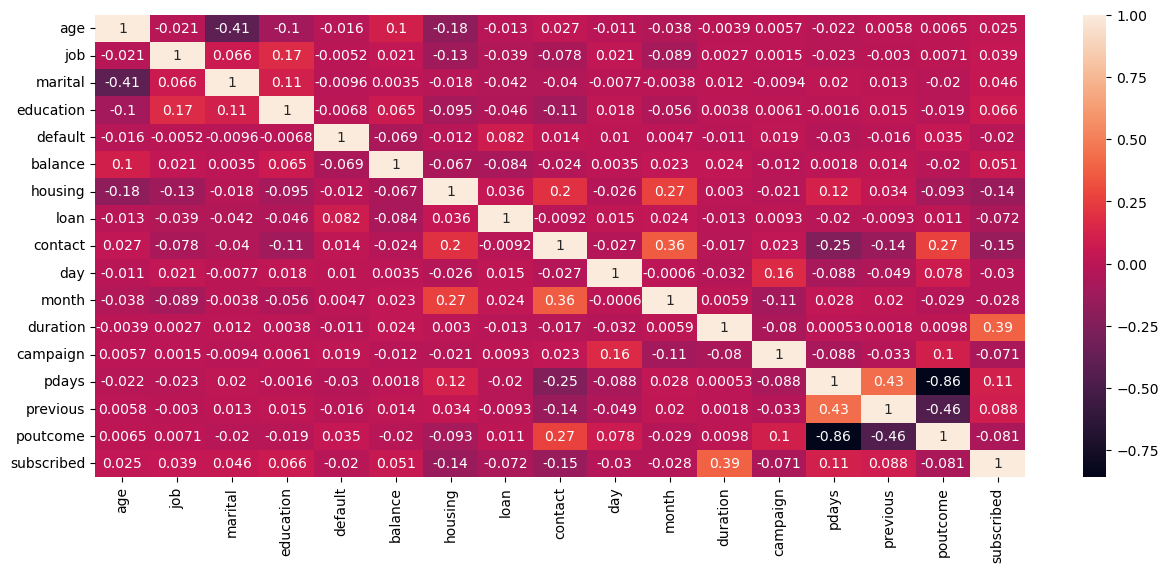

In [49]:
df_corr = train_df.corr()

plt.figure(figsize = (15,6))
sns.heatmap(df_corr,annot=True,annot_kws ={'size':10})
plt.show()

we dont see much correlation among features as well as between features and target and also we see slight correlation between pdays and previous that is 0.43%. Feature duration is slightly correlated with target that is 0.39%

In [50]:
train_df.corr().sum()

age           0.355539
job           0.944646
marital       0.711224
education     1.013289
default       0.968457
balance       1.033513
housing       0.876688
loan          0.830488
contact       1.050070
day           1.033511
month         1.388896
duration      1.296645
campaign      0.904214
pdays         0.331900
previous      0.906538
poutcome     -0.062384
subscribed    1.219803
dtype: float64

we see all the columns are positively correlated except poutcome 

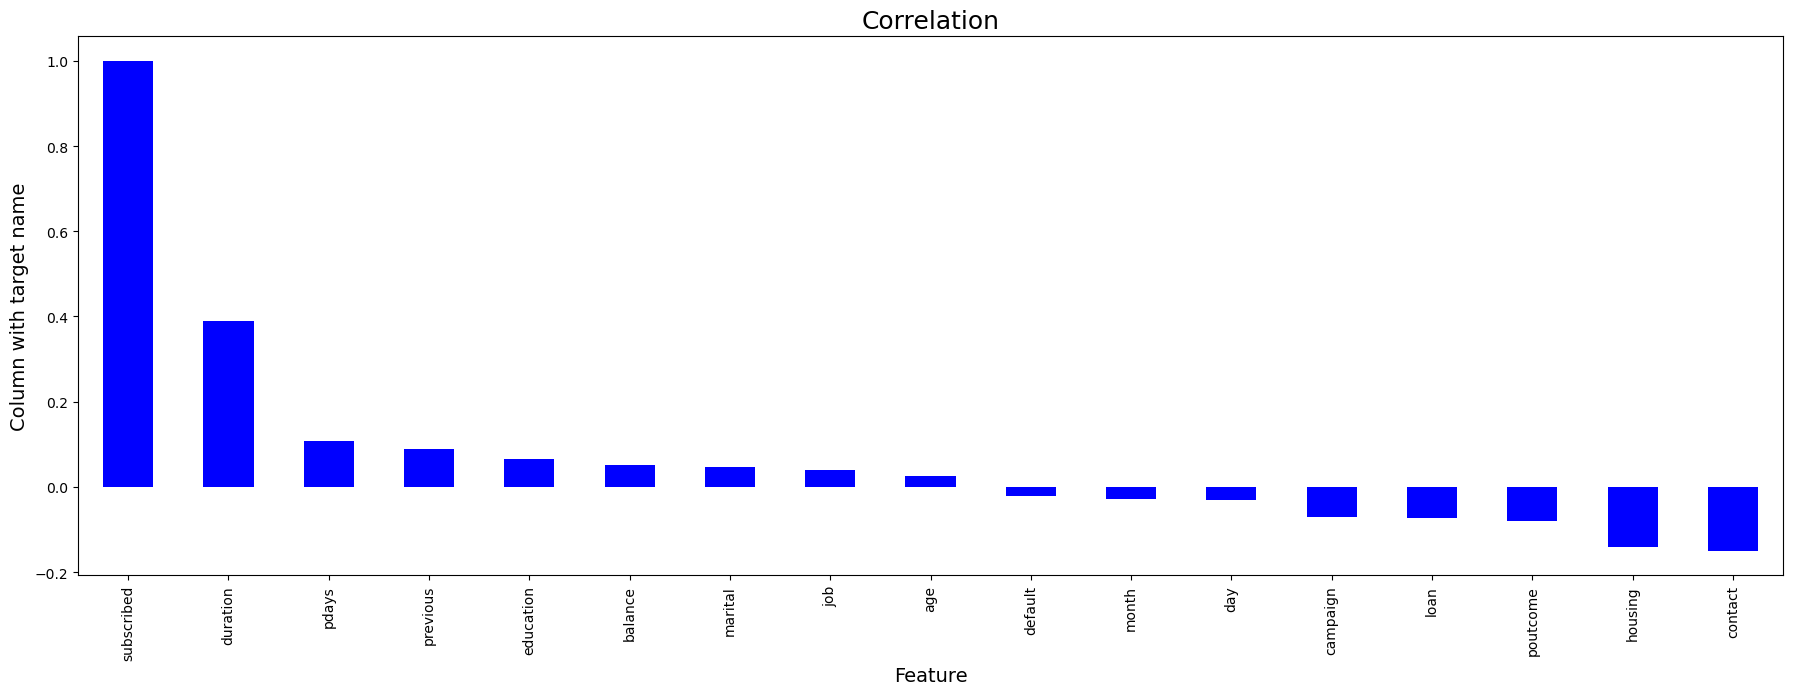

In [51]:
plt.figure(figsize=(22,7))
train_df.corr()['subscribed'].sort_values(ascending=False).plot(kind='bar',color='b')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('Column with target name',fontsize=14)
plt.title('Correlation',fontsize=18)
plt.show()


We see duration is highly correlated with target, age and default are having less correlation, contact is highest negatively correlated with target

In [52]:
train_df.describe()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
count,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000
mean,40.957247,4.332923,1.167220,1.225013,0.018485,1363.890258,0.555629,0.162132,0.644642,15.835466,5.533131,258.113534,2.765697,39.576042,0.574272,2.566152,0.117389
std,10.625134,3.271868,0.607186,0.749195,0.134700,3028.304293,0.496904,0.368578,0.899480,8.337097,3.004247,257.118973,3.113830,99.317592,2.422529,0.982069,0.321888
min,18.000000,0.000000,0.000000,0.000000,0.000000,-8019.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,-1.000000,0.000000,0.000000,0.000000
25%,33.000000,1.000000,1.000000,1.000000,0.000000,73.000000,0.000000,0.000000,0.000000,8.000000,3.000000,104.000000,1.000000,-1.000000,0.000000,3.000000,0.000000
50%,39.000000,4.000000,1.000000,1.000000,0.000000,450.000000,1.000000,0.000000,0.000000,16.000000,6.000000,180.000000,2.000000,-1.000000,0.000000,3.000000,0.000000
75%,48.000000,7.000000,2.000000,2.000000,0.000000,1431.000000,1.000000,0.000000,2.000000,21.000000,8.000000,318.500000,3.000000,-1.000000,0.000000,3.000000,0.000000
max,95.000000,11.000000,2.000000,3.000000,1.000000,102127.000000,1.000000,1.000000,2.000000,31.000000,11.000000,4918.000000,63.000000,871.000000,275.000000,3.000000,1.000000


we see
1. all the counts are same.
2. std deviation is high in balance, pdays, and previous features
3. there are outliers and also skewness in most of the columns

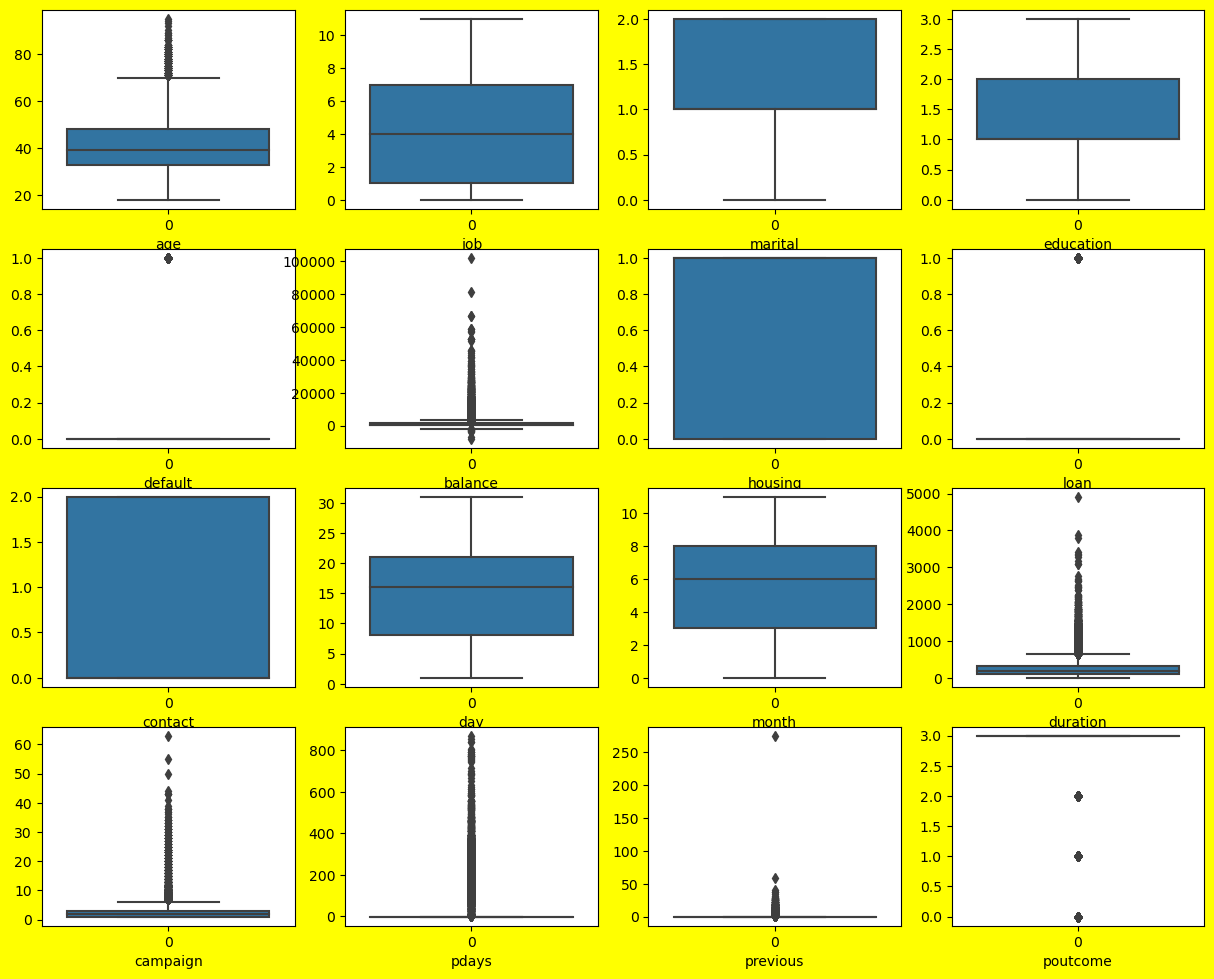

In [53]:
plt.figure(figsize =(15,15), facecolor = 'Yellow')
num = 1
for column in train_df.drop('subscribed', axis=1):
    if num <=18:
        plt.subplot(5,4,num)
        sns.boxplot(data = train_df[column])
        plt.xlabel(column,fontsize = 10)
        
    num +=1
plt.show()

since we have huge outliers in most of the columns we need to drop the features before that we check with the skewness, if it is high we will drop those features

We see there are huge outliers in Age,Balance, default, loan, duration, campaign, pdays, previous and poutcome. But default, loan and poutcome are categorical data. so we dont treat outliers or skewness. 

Here we consider only age, balance, duration, campaign, pdays and previous to treat outliers and also skewness, if the skewness is also high then we will drop these columns.

In [54]:
train_df.skew()

age            0.681607
job            0.264817
marital       -0.100071
education      0.199441
default        7.149903
balance        7.995696
housing       -0.223918
loan           1.833474
contact        0.758602
day            0.087185
month         -0.486498
duration       3.199766
campaign       4.873935
pdays          2.642374
previous      49.302348
poutcome      -1.996421
subscribed     2.377445
dtype: float64

since we see balance, duration, campaign, pdays and previous are having huge skewness we will drop those columns

In [55]:
train_df.drop(['balance','duration','campaign','pdays','previous'], axis=1, inplace=True)

In [56]:
train_df

,age,job,marital,education,default,housing,loan,contact,day,month,poutcome,subscribed
0,56,0,1,3,0,0,0,1,19,9,3,0
1,31,11,1,1,0,0,0,0,20,5,3,0
2,27,7,1,1,0,1,0,0,18,5,3,0
3,57,4,0,2,0,0,0,0,22,6,2,1
4,31,9,1,1,0,1,0,0,4,3,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...
31642,29,4,2,2,0,1,0,0,12,8,3,0
31643,53,4,0,2,0,0,1,0,5,6,3,1
31644,32,4,2,2,0,0,0,0,7,1,3,0
31645,57,9,1,1,0,1,0,1,15,8,0,0


In [57]:
#treat Outliers
from scipy.stats import zscore
z = np.abs(zscore(train_df))
np.where(z>3) #threshold = 3
z_train_df=train_df[(z<3).all(axis=1)]
z_train_df.shape

(30791, 12)

In [58]:
print("data_loss =   ", ((train_df.shape[0]-z_train_df.shape[0])/train_df.shape[0])*100)

data_loss =    2.7048377413340914


In [59]:
q1 = train_df.quantile(0.25)
q3 = train_df.quantile(0.75)

iqr = q3-q1

iqr_train_df = train_df[~((train_df <(q1 - 1.5*iqr))| (train_df>(q3+1.5*iqr))).any(axis=1)]
iqr_train_df.shape

(19029, 12)

In [60]:
print("data_loss =   ", ((train_df.shape[0]-iqr_train_df.shape[0])/train_df.shape[0])*100)

data_loss =    39.87107782728221


We see there is 2.7% of data loss from z-score method so, we consider new dataframe after removing the outlier by z-score methosd.

In [61]:
#after removing the outliers we check for the skewness
z_train_df.skew()

age           0.449340
job           0.265888
marital      -0.101135
education     0.193642
default       0.000000
housing      -0.246413
loan          1.861074
contact       0.760319
day           0.087882
month        -0.494182
poutcome     -1.987565
subscribed    2.403761
dtype: float64

We dont see much skewness in any of the columns so all the columns are normally distributed.

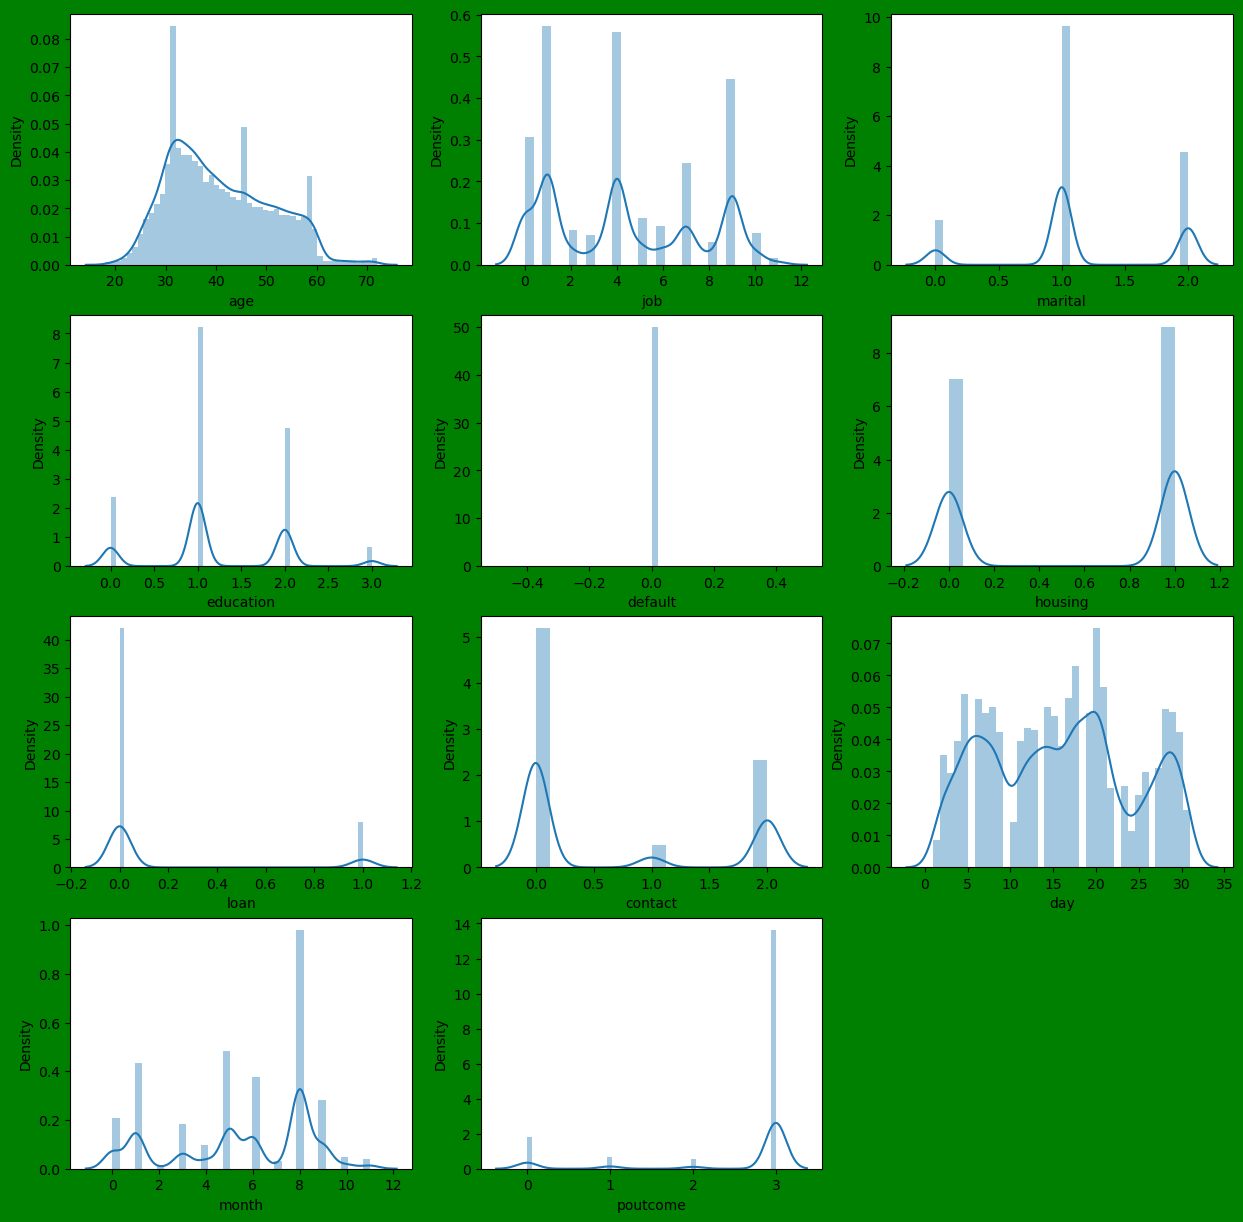

In [62]:
plt.figure(figsize =(15,15), facecolor = 'green')
num = 1
for column in z_train_df.drop('subscribed',axis=1):
    if num <=12:
        ax = plt.subplot(4,3,num)
        sns.distplot(z_train_df[column])
        plt.xlabel(column,fontsize = 10)
        
    num +=1
plt.show()

#### Now, we will check for multicollinearity

In [63]:
X = z_train_df.drop(['subscribed'], axis = 1)
y = z_train_df['subscribed']

In [64]:
X.shape

(30791, 11)

In [65]:
y.shape

(30791,)

#### Standard-scaler

In [66]:
from sklearn.preprocessing import StandardScaler

In [67]:
sr = StandardScaler()
X = pd.DataFrame(sr.fit_transform(X), columns = X.columns)
X

,age,job,marital,education,default,housing,loan,contact,day,month,poutcome
0,1.520358,-1.318225,-0.283303,2.374360,0.0,-1.130761,-0.435457,0.395040,0.380255,1.155851,0.442660
1,-0.956370,2.030842,-0.283303,-0.306765,0.0,-1.130761,-0.435457,-0.714684,0.500277,-0.177038,0.442660
2,-1.352647,0.812999,-0.283303,-0.306765,0.0,0.884360,-0.435457,-0.714684,0.260232,-0.177038,0.442660
3,1.619427,-0.100383,-1.933543,1.033797,0.0,-1.130761,-0.435457,-0.714684,0.740322,0.156184,-0.572228
4,-0.956370,1.421920,-0.283303,-0.306765,0.0,0.884360,-0.435457,-0.714684,-1.420081,-0.843483,0.442660
...,...,...,...,...,...,...,...,...,...,...,...
30786,-1.154509,-0.100383,1.366938,1.033797,0.0,0.884360,-0.435457,-0.714684,-0.459902,0.822629,0.442660
30787,1.223150,-0.100383,-1.933543,1.033797,0.0,-1.130761,2.296440,-0.714684,-1.300058,0.156184,0.442660
30788,-0.857301,-0.100383,1.366938,1.033797,0.0,-1.130761,-0.435457,-0.714684,-1.060013,-1.509928,0.442660
30789,1.619427,1.421920,-0.283303,-0.306765,0.0,0.884360,-0.435457,0.395040,-0.099835,0.822629,-2.602002


In [68]:
#now check for Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['VIF Values']=[variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
vif['Features'] = X.columns

vif

,VIF Values,Features
0,1.258052,age
1,1.051128,job
2,1.224445,marital
3,1.063065,education
4,NaN,default
5,1.173563,housing
6,1.007354,loan
7,1.320347,contact
8,1.009965,day
9,1.234006,month


We dont see any multicollinearity among the features, since all are in range.

In [69]:
y.value_counts()

0    27230
1     3561
Name: subscribed, dtype: int64

we see our data is imbalanced. So we need to balance the data using Oversampling method.

In [70]:
from imblearn.over_sampling import SMOTE
sm = SMOTE()
X, y = sm.fit_resample(X,y)

In [71]:
y.value_counts()

0    27230
1    27230
Name: subscribed, dtype: int64

In [72]:
X.shape

(54460, 11)

In [73]:
y.shape

(54460,)

Now we have balanced our dataset, So we will build our model before that we will split dataset into train and test data.

In [74]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import f1_score, accuracy_score, classification_report, roc_curve, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.svm import SVC

In [116]:
accuracy = 0
r_state =0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(X,y, test_size = 0.30, random_state = i)
    log = LogisticRegression()
    log.fit(x_train,y_train)
    y_pred = log.predict(x_test)
    acc = accuracy_score(y_test,y_pred)
    if acc>accuracy:
        accuracy=acc
        r_state = i
print("max aaccuracy score is ", accuracy , "randomstate = ",r_state)

max aaccuracy score is  0.6596278614273473 randomstate =  161


In [117]:
x_train,x_test,y_train,y_test=train_test_split(X,y,random_state=161,test_size=0.30)


In [118]:
x_train.shape

(38122, 11)

In [119]:
y_train.shape

(38122,)

In [120]:
x_test.shape

(16338, 11)

In [121]:
y_test.shape

(16338,)

In [122]:
log = LogisticRegression()
log.fit(x_train,y_train)
log_pred = log.predict(x_test)
log_pred_train = log.predict(x_train)
print("Logistic Regression")
print("Accuracy of train data is  ",accuracy_score(y_train, log_pred_train)*100, "%")
log_accu = accuracy_score(y_test, log_pred) 
print("Accuracy of test data is  ", (log_accu)*100 ,"%")
print("\n Confusion Matrix", confusion_matrix(y_test,log_pred))
print('\n Test Classification Report \n', classification_report(y_test,log_pred))
print("****************************************")
print("\n")

rfc = RandomForestClassifier()
rfc.fit(x_train,y_train)
rfc_pred = rfc.predict(x_test)
rfc_pred_train = rfc.predict(x_train)
print("Random Forest Classifier")
print("Accuracy of train data is  ",accuracy_score(y_train, rfc_pred_train)*100, "%")
rfc_accu = accuracy_score(y_test, rfc_pred) 
print("Accuracy of test data is  ", (rfc_accu)*100,"%")
print("\n Confusion Matrix", confusion_matrix(y_test,rfc_pred))
print('\n Test Classification Report \n', classification_report(y_test,rfc_pred))
print("****************************************")
print("\n")

bc = BaggingClassifier()
bc.fit(x_train,y_train)
bc_pred = bc.predict(x_test)
bc_pred_train = bc.predict(x_train)
print("Bagging Classifier")
print("Accuracy of train data is  ",accuracy_score(y_train, bc_pred_train)*100, "%")
bc_accu = accuracy_score(y_test, bc_pred)
print("Accuracy of test data is  ", (bc_accu)*100,"%")
print("\n Confusion Matrix", confusion_matrix(y_test,bc_pred))
print('\n Test Classification Report \n', classification_report(y_test,bc_pred))
print("****************************************")
print("\n")

abc = AdaBoostClassifier()
abc.fit(x_train,y_train)
abc_pred = abc.predict(x_test)
abc_pred_train = abc.predict(x_train)
print("AdaBoost Classifier")
print("Accuracy of train data is  ",accuracy_score(y_train, abc_pred_train)*100, "%")
abc_accu = accuracy_score(y_test, abc_pred)
print("Accuracy of test data is  ", (abc_accu) *100 ,"%")
print("\n Confusion Matrix", confusion_matrix(y_test,abc_pred))
print('\n Test Classification Report \n', classification_report(y_test,abc_pred))
print("****************************************")
print("\n")

gbc = GradientBoostingClassifier()
gbc.fit(x_train,y_train)
gbc_pred = gbc.predict(x_test)
gbc_pred_train = gbc.predict(x_train)
print("Gradient Boosting Classifier")
print("Accuracy of train data is  ",accuracy_score(y_train, gbc_pred_train)*100, "%")
gbc_accu = accuracy_score(y_test, gbc_pred) 
print("Accuracy of test data is  ", (gbc_accu)*100 ,"%")
print("\n Confusion Matrix", confusion_matrix(y_test,gbc_pred))
print('\n Test Classification Report \n', classification_report(y_test,gbc_pred))
print("****************************************")
print("\n")

etc = ExtraTreesClassifier()
etc.fit(x_train,y_train)
etc_pred = etc.predict(x_test)
etc_pred_train = etc.predict(x_train)
print("Extra Trees Classifier")
print("Accuracy of train data is  ",accuracy_score(y_train, etc_pred_train)*100, "%")
etc_accu = accuracy_score(y_test, etc_pred) 
print("Accuracy of test data is  ", (etc_accu)*100, "%")
print("\n Confusion Matrix", confusion_matrix(y_test,etc_pred))
print('\n Test Classification Report \n', classification_report(y_test,etc_pred))
print("****************************************")
print("\n")

dtc = DecisionTreeClassifier()
dtc.fit(x_train,y_train)
dtc_pred = dtc.predict(x_test)
dtc_pred_train = dtc.predict(x_train)
print("Decision Trees Classifier")
print("Accuracy of train data is  ",accuracy_score(y_train, dtc_pred_train)*100, "%")
dtc_accu = accuracy_score(y_test, dtc_pred) 
print("Accuracy of test data is  ", (dtc_accu)*100 ,"%")
print("\n Confusion Matrix", confusion_matrix(y_test,dtc_pred))
print('\n Test Classification Report \n', classification_report(y_test,dtc_pred))
print("****************************************")
print("\n")

knn = KNN()
knn.fit(x_train,y_train)
knn_pred = knn.predict(x_test)
knn_pred_train = knn.predict(x_train)
print("K-Nearest Neighbors")
print("Accuracy of train data is  ",accuracy_score(y_train, knn_pred_train)*100, "%")
knn_accu = accuracy_score(y_test, knn_pred) 
print("Accuracy of test data is  ", (knn_accu)*100 ,"%")
print("\n Confusion Matrix", confusion_matrix(y_test, knn_pred))
print('\n Test Classification Report \n', classification_report(y_test, knn_pred))
print("****************************************")
print("\n")


svc = SVC()
svc.fit(x_train,y_train)
svc_pred = svc.predict(x_test)
svc_pred_train = svc.predict(x_train)
print("Super-Vector Classification")
print("Accuracy of train data is  ",accuracy_score(y_train, svc_pred_train)*100 , "%")
svc_accu = accuracy_score(y_test, svc_pred) 
print("Accuracy of test data is  ", (svc_accu)*100,"%")
print("\n Confusion Matrix", confusion_matrix(y_test, svc_pred))
print('\n Test Classification Report \n', classification_report(y_test, svc_pred))
print("****************************************")
print("\n")


Logistic Regression
Accuracy of train data is   64.54278369445464 %
Accuracy of test data is   65.96278614273473 %

 Confusion Matrix [[4876 3274]
 [2287 5901]]

 Test Classification Report 
               precision    recall  f1-score   support

           0       0.68      0.60      0.64      8150
           1       0.64      0.72      0.68      8188

    accuracy                           0.66     16338
   macro avg       0.66      0.66      0.66     16338
weighted avg       0.66      0.66      0.66     16338

****************************************


Random Forest Classifier
Accuracy of train data is   99.60390325796128 %
Accuracy of test data is   92.3001591382054 %

 Confusion Matrix [[7619  531]
 [ 727 7461]]

 Test Classification Report 
               precision    recall  f1-score   support

           0       0.91      0.93      0.92      8150
           1       0.93      0.91      0.92      8188

    accuracy                           0.92     16338
   macro avg       0.92 

In [123]:
Accuracy = pd.DataFrame({'Models':['Logistic', 'RandomForest Classifier', 'Bagging Classifier', 'AdaBoost Classifier', 'GradientBoosting','ExtraTreesClassifier','DecisionTree', 'Knn','svc'],
                          'Accuracy_score':[log_accu, rfc_accu, bc_accu,abc_accu,gbc_accu,etc_accu,dtc_accu,knn_accu,svc_accu]
                        })
Accuracy


,Models,Accuracy_score
0,Logistic,0.659628
1,RandomForest Classifier,0.923002
2,Bagging Classifier,0.917371
3,AdaBoost Classifier,0.782715
4,GradientBoosting,0.850471
5,ExtraTreesClassifier,0.922940
6,DecisionTree,0.889277
7,Knn,0.834007
8,svc,0.718081


#### Cross-validation Score

In [124]:
print('\n Logistic Regression \n')
log_score = cross_val_score(log, X, y, cv=3)
print(log_score)
print(np.mean(log_score))
log_diff = (log_accu - log_score.mean())
print(log_diff)
print("====================================\n ")


print('\n Random Forest Classifier \n')
rfc_score = cross_val_score(rfc, X, y, cv=3)
print(rfc_score)
print(np.mean(rfc_score))
rfc_diff = (rfc_accu - rfc_score.mean())
print(rfc_diff)
print("====================================\n ")


print('\n Bagging Classifier \n')
bc_score = cross_val_score(bc, X, y, cv=3)
print(bc_score)
print(np.mean(bc_score))
bc_diff = (bc_accu - bc_score.mean())
print(bc_diff)
print("====================================\n ")


print('\n AdaBoost Classifier \n')
abc_score = cross_val_score(abc, X, y, cv=3)
print(abc_score)
print(np.mean(abc_score))
abc_diff = (abc_accu - abc_score.mean())
print(abc_diff)
print("====================================\n ")

print('\n Gradient Boosting Classifier \n')
gbc_score = cross_val_score(gbc, X, y, cv=3)
print(gbc_score)
print(np.mean(gbc_score))
gbc_diff = (gbc_accu - gbc_score.mean())
print(gbc_diff)
print("====================================\n ")

print('\n ExtraTrees Classifier \n')
etc_score = cross_val_score(etc, X, y, cv=3)
print(etc_score)
print(np.mean(etc_score))
etc_diff = (etc_accu - etc_score.mean())
print(etc_diff)
print("====================================\n ")

print('\n DecisionTree Classifier \n')
dtc_score = cross_val_score(dtc, X, y, cv=3)
print(dtc_score)
print(np.mean(dtc_score))
dtc_diff = (dtc_accu - dtc_score.mean())
print(dtc_diff)
print("====================================\n ")

print('\n K-Neighbors Classifier \n')
knn_score = cross_val_score(knn, X, y, cv=3)
print(knn_score)
print(np.mean(knn_score))
knn_diff = (knn_accu - knn_score.mean())
print(knn_diff)
print("====================================\n ")

print('\n Super Vector Classifier \n')
svc_score = cross_val_score(svc, X, y, cv=3)
print(svc_score)
print(np.mean(svc_score))
svc_diff = (svc_accu - svc_score.mean())
print(svc_diff)
print("====================================\n ")


 Logistic Regression 

[0.64332929 0.65140748 0.64969977]
0.6481455162729058
0.011482345154441465
 

 Random Forest Classifier 

[0.86785281 0.94375585 0.93951413]
0.9170409325765291
0.005960658805524988
 

 Bagging Classifier 

[0.84482759 0.94166254 0.93472153]
0.9070705516519547
0.010299995538643913
 

 AdaBoost Classifier 

[0.75327751 0.80190602 0.79050295]
0.7818954942706514
0.0008196483416634814
 

 Gradient Boosting Classifier 

[0.79249752 0.87098551 0.86905746]
0.8441801631039643
0.006291130812059675
 

 ExtraTrees Classifier 

[0.89467886 0.93609872 0.93180191]
0.9208598270467938
0.002080557333179245
 

 DecisionTree Classifier 

[0.83298447 0.90629648 0.90139371]
0.8802248850609407
0.009051648174461469
 

 K-Neighbors Classifier 

[0.83458191 0.83600507 0.83104721]
0.8338780627277341
0.00012854762849057177
 

 Super Vector Classifier 

[0.70717197 0.7129951  0.70754145]
0.7092361745171024
0.00884437389763626
 


In [125]:
CV_data = pd.DataFrame({'Models':['Logistic', 'RandomForest Classifier', 'Bagging Classifier', 'AdaBoost Classifier', 'GradientBoosting','ExtraTreesClassifier','DecisionTree', 'Knn','svc'],
                          'Diff_score':[log_diff, rfc_diff, bc_diff,abc_diff,gbc_diff,etc_diff,dtc_diff,knn_diff,svc_diff]
                        })
CV_data

,Models,Diff_score
0,Logistic,0.011482
1,RandomForest Classifier,0.005961
2,Bagging Classifier,0.010300
3,AdaBoost Classifier,0.000820
4,GradientBoosting,0.006291
5,ExtraTreesClassifier,0.002081
6,DecisionTree,0.009052
7,Knn,0.000129
8,svc,0.008844


We see that KNN model is giving the least difference approximately to 0, So we will tune KNN models and check for best accuracy

#### Hyper-parameter Tuning

#### Gridsearch CV for Logistic Regression

In [126]:
param_grid = {"n_neighbors":[5,6,8,10,12],"weights":['uniform', 'distance'], 
              "algorithm": ['auto','kd_tree','ball_tree'],"leaf_size": [30,32,34,36,40]}

In [127]:
knn_grd = GridSearchCV(KNN(), param_grid, cv=3)
knn_grd.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'kd_tree', 'ball_tree'],
                         'leaf_size': [30, 32, 34, 36, 40],
                         'n_neighbors': [5, 6, 8, 10, 12],
                         'weights': ['uniform', 'distance']})

In [128]:
best_parameters=knn_grd.best_params_
print(best_parameters)
best_result=knn_grd.best_score_
print(best_result*100)

{'algorithm': 'ball_tree', 'leaf_size': 30, 'n_neighbors': 6, 'weights': 'distance'}
83.79938304563842


In [129]:
knn_term = KNN(algorithm='ball_tree', leaf_size=30, n_neighbors=6, weights='distance')

In [130]:
knn_term.fit(x_train,y_train)
knn_term_pred = knn_term.predict(x_test)
knn_term_accu = accuracy_score(y_test,knn_term_pred) * 100
print(f"Accuracy Score of test data is: ",knn_term_accu ,"%")
print("\n Confusion Matrix", confusion_matrix(y_test,knn_term_pred))
print('\n Test Classification Report \n', classification_report(y_test,knn_term_pred))

Accuracy Score of test data is:  85.94075162198556 %

 Confusion Matrix [[6441 1709]
 [ 588 7600]]

 Test Classification Report 
               precision    recall  f1-score   support

           0       0.92      0.79      0.85      8150
           1       0.82      0.93      0.87      8188

    accuracy                           0.86     16338
   macro avg       0.87      0.86      0.86     16338
weighted avg       0.87      0.86      0.86     16338



In [136]:
knn_term1 = KNN(algorithm='auto', leaf_size=32, n_neighbors=6, weights='distance')

In [137]:
knn_term1.fit(x_train,y_train)
knn_term1_pred = knn_term1.predict(x_test)
knn_term1_accu = accuracy_score(y_test,knn_term1_pred) * 100
print(f"Accuracy Score of test data is: ",knn_term1_accu ,"%")
print("\n Confusion Matrix", confusion_matrix(y_test,knn_term1_pred))
print('\n Test Classification Report \n', classification_report(y_test,knn_term1_pred))

Accuracy Score of test data is:  85.95299302240176 %

 Confusion Matrix [[6443 1707]
 [ 588 7600]]

 Test Classification Report 
               precision    recall  f1-score   support

           0       0.92      0.79      0.85      8150
           1       0.82      0.93      0.87      8188

    accuracy                           0.86     16338
   macro avg       0.87      0.86      0.86     16338
weighted avg       0.87      0.86      0.86     16338



In [140]:
knn_term2 = KNN(algorithm='ball_tree', leaf_size=28, n_neighbors=4, weights='distance')

In [141]:
knn_term2.fit(x_train,y_train)
knn_term2_pred = knn_term2.predict(x_test)
knn_term2_accu = accuracy_score(y_test,knn_term2_pred) * 100
print(f"Accuracy Score of test data is: ",knn_term2_accu ,"%")
print("\n Confusion Matrix", confusion_matrix(y_test,knn_term2_pred))
print('\n Test Classification Report \n', classification_report(y_test,knn_term2_pred))

Accuracy Score of test data is:  87.08532256090096 %

 Confusion Matrix [[6623 1527]
 [ 583 7605]]

 Test Classification Report 
               precision    recall  f1-score   support

           0       0.92      0.81      0.86      8150
           1       0.83      0.93      0.88      8188

    accuracy                           0.87     16338
   macro avg       0.88      0.87      0.87     16338
weighted avg       0.88      0.87      0.87     16338



### We see that
#### Before tuning the parameters accuracy score was 83% and type1 and type2 errors were 1929 and 794 


#### After tuning the parameters using <b> algorithm='ball_tree', leaf_size=30, n_neighbors=6, weights='distance' </b> the accuracy has increased to 86.3% and type1 and type2 errors were 1709 andd 588 .

### Again tried with changing parameter using <b> algorithm='ball_tree', leaf_size=28, n_neighbors=4, weights='distance' </b> the accuracy has increased to 87.08% and type1 and type2 errors have been reduced to 1527 and 583. So, we consider KNN as the best and accurate model


#### plot auc_roc Curve 

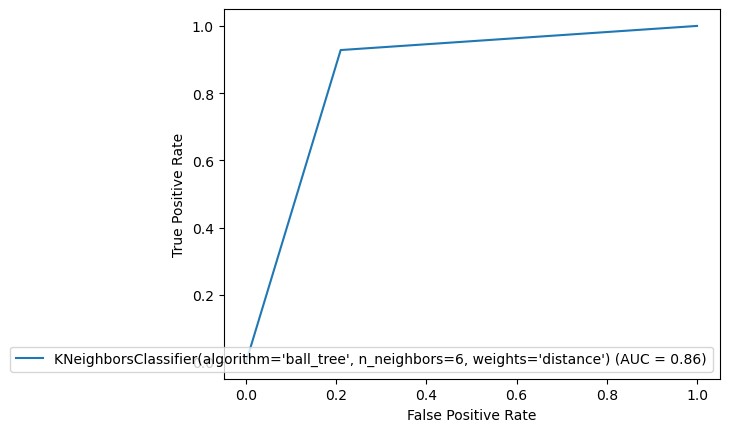

In [146]:
from sklearn import metrics
fpr,tpr,thresholds = metrics.roc_curve(y_test,knn_term_pred)
roc_auc = metrics.auc(fpr,tpr)
display = metrics.RocCurveDisplay(fpr = fpr, tpr = tpr, roc_auc=roc_auc,estimator_name=knn_term)
display.plot()

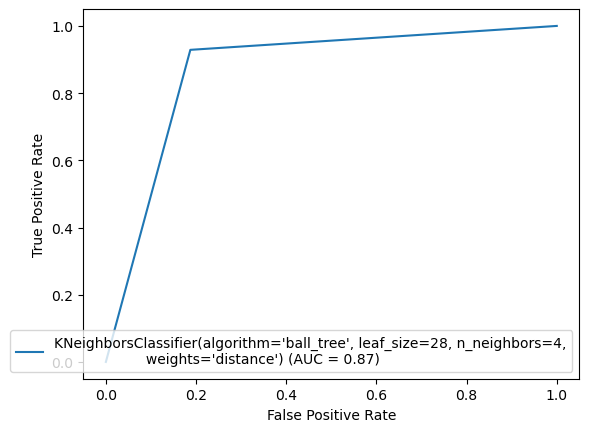

In [147]:
from sklearn import metrics
fpr,tpr,thresholds = metrics.roc_curve(y_test,knn_term2_pred)
roc_auc = metrics.auc(fpr,tpr)
display = metrics.RocCurveDisplay(fpr = fpr, tpr = tpr, roc_auc=roc_auc,estimator_name=knn_term2)
display.plot()

#### Save the model

In [148]:
#save the model
import joblib
joblib.dump(knn_term2,"bank_termdeposit_prediction.pkl")

['bank_termdeposit_prediction.pkl']

In [149]:
model = joblib.load("bank_termdeposit_prediction.pkl")
result = model.score(x_test,y_test)
print(result)

0.8708532256090097


### We have saved the model Now we need to predict on test Dataset. So we need to preprocess all the steps done on train data.

In [171]:
test_df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset5/main/termdeposit_test.csv')
test_df

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,38441,32,services,married,secondary,no,118,yes,no,cellular,15,may,20,6,-1,0,unknown
1,40403,78,retired,divorced,primary,no,2787,no,no,telephone,1,jul,372,1,-1,0,unknown
2,3709,31,self-employed,single,tertiary,no,144,yes,no,unknown,16,may,676,1,-1,0,unknown
3,37422,57,services,single,primary,no,3777,yes,no,telephone,13,may,65,2,-1,0,unknown
4,12527,45,blue-collar,divorced,secondary,no,-705,no,yes,unknown,3,jul,111,1,-1,0,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13559,23465,39,management,married,tertiary,no,45,no,no,cellular,28,aug,148,4,-1,0,unknown
13560,11743,54,blue-collar,married,primary,no,2281,yes,no,unknown,20,jun,158,1,-1,0,unknown
13561,28292,35,retired,married,primary,no,285,yes,no,cellular,29,jan,136,1,-1,0,unknown
13562,45163,29,admin.,single,secondary,no,464,no,no,cellular,9,nov,208,2,91,3,success


In [172]:
test_df.shape

(13564, 17)

In [173]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13564 entries, 0 to 13563
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         13564 non-null  int64 
 1   age        13564 non-null  int64 
 2   job        13564 non-null  object
 3   marital    13564 non-null  object
 4   education  13564 non-null  object
 5   default    13564 non-null  object
 6   balance    13564 non-null  int64 
 7   housing    13564 non-null  object
 8   loan       13564 non-null  object
 9   contact    13564 non-null  object
 10  day        13564 non-null  int64 
 11  month      13564 non-null  object
 12  duration   13564 non-null  int64 
 13  campaign   13564 non-null  int64 
 14  pdays      13564 non-null  int64 
 15  previous   13564 non-null  int64 
 16  poutcome   13564 non-null  object
dtypes: int64(8), object(9)
memory usage: 1.8+ MB


#### We see there are 13564 rows and 17 columns. We dont have null values so no need to treat nulls. we will remove unwanted columns that are dropped in train dataset and then encode the object data into int data

#### drop the unwanted columns

In [174]:
test_df.drop(['ID', 'balance','duration','campaign','pdays','previous'], axis=1, inplace=True)
test_df.head()

,age,job,marital,education,default,housing,loan,contact,day,month,poutcome
0,32,services,married,secondary,no,yes,no,cellular,15,may,unknown
1,78,retired,divorced,primary,no,no,no,telephone,1,jul,unknown
2,31,self-employed,single,tertiary,no,yes,no,unknown,16,may,unknown
3,57,services,single,primary,no,yes,no,telephone,13,may,unknown
4,45,blue-collar,divorced,secondary,no,no,yes,unknown,3,jul,unknown


In [175]:
le = LabelEncoder()
for i in test_df.columns:
    if test_df[i].dtypes == 'object':
        test_df[i] = le.fit_transform(test_df[i])
test_df.head()

,age,job,marital,education,default,housing,loan,contact,day,month,poutcome
0,32,7,1,1,0,1,0,0,15,8,3
1,78,5,0,0,0,0,0,1,1,5,3
2,31,6,2,2,0,1,0,2,16,8,3
3,57,7,2,0,0,1,0,1,13,8,3
4,45,1,0,1,0,0,1,2,3,5,3


#### treat the outliers

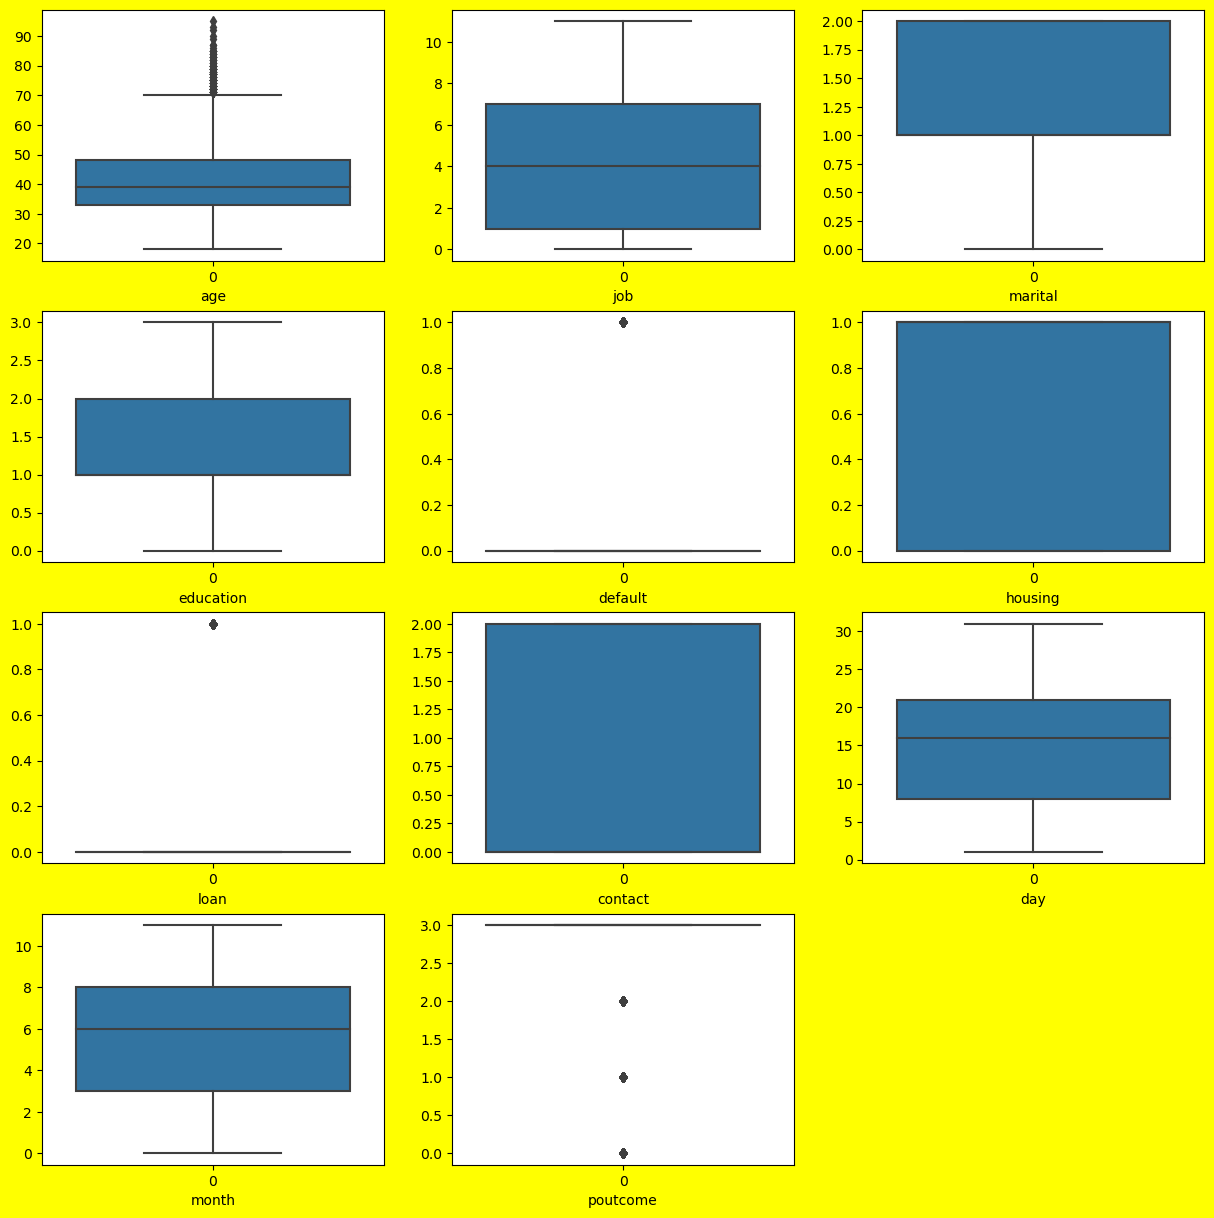

In [176]:
plt.figure(figsize =(15,15), facecolor = 'Yellow')
num = 1
for column in test_df:
    if num <=12:
        plt.subplot(4,3,num)
        sns.boxplot(data = test_df[column])
        plt.xlabel(column,fontsize = 10)
        
    num +=1
plt.show()

In [177]:
### Treating Outliers

z = np.abs(zscore(test_df))
np.where(z>3) #threshold = 3
z_test_df=test_df[(z<3).all(axis=1)]
z_test_df.shape

(13224, 11)

In [178]:
print("data_loss =   ", ((test_df.shape[0]-z_test_df.shape[0])/test_df.shape[0])*100)

data_loss =    2.506635210852256


Here also we see 2.5% of dataloss

In [179]:
z_test_df.skew()

age          0.454368
job          0.254652
marital     -0.111002
education    0.185530
default      0.000000
housing     -0.242257
loan         1.918591
contact      0.797816
day          0.107955
month       -0.467127
poutcome    -1.911869
dtype: float64

In [180]:
sr = StandardScaler()
x_df_test = pd.DataFrame(sr.fit_transform(z_test_df), columns = z_test_df.columns)
x_df_test

,age,job,marital,education,default,housing,loan,contact,day,month,poutcome
0,-0.853286,0.803941,-0.281941,-0.308185,0.0,0.886193,-0.426468,-0.702246,-0.087679,0.831997,0.453536
1,-0.952456,0.499885,1.356909,1.039960,0.0,0.886193,-0.426468,1.531160,0.032948,0.831997,0.453536
2,1.625964,0.803941,1.356909,-1.656331,0.0,0.886193,-0.426468,0.414457,-0.328934,0.831997,0.453536
3,0.435924,-1.020394,-1.920791,-0.308185,0.0,-1.128422,2.344841,1.531160,-1.535210,-0.162699,0.453536
4,-0.853286,-0.108227,1.356909,1.039960,0.0,0.886193,-0.426468,-0.702246,0.756713,-0.162699,0.453536
...,...,...,...,...,...,...,...,...,...,...,...
13219,-0.159096,-0.108227,-0.281941,1.039960,0.0,-1.128422,-0.426468,-0.702246,1.480479,-1.488959,0.453536
13220,1.328454,-1.020394,-0.281941,-1.656331,0.0,0.886193,-0.426468,1.531160,0.515458,0.168866,0.453536
13221,-0.555776,0.195829,-0.281941,-1.656331,0.0,0.886193,-0.426468,-0.702246,1.601106,-0.494264,0.453536
13222,-1.150796,-1.324450,1.356909,-0.308185,0.0,-1.128422,-0.426468,-0.702246,-0.811445,1.163562,-0.538780


In [181]:
### check for multicollinearity

vif = pd.DataFrame()
vif['VIF Values']=[variance_inflation_factor(x_df_test.values, i) for i in range(len(x_df_test.columns))]
vif['Features'] = test_df.columns

vif

,VIF Values,Features
0,1.259120,age
1,1.048215,job
2,1.215007,marital
3,1.061760,education
4,NaN,default
5,1.173636,housing
6,1.012280,loan
7,1.312148,contact
8,1.014187,day
9,1.234032,month


#### Now we have completed with all the preprocessing steps next we will load the model and predict for test dataset

In [182]:
Bank_predict = joblib.load("bank_termdeposit_prediction.pkl")
Bank_predict

KNeighborsClassifier(algorithm='ball_tree', leaf_size=28, n_neighbors=4,
                     weights='distance')

In [183]:
test_prediction = Bank_predict.predict(x_df_test)

In [184]:
test_prediction

array([0, 0, 1, ..., 0, 1, 0])

In [185]:
z_test_df['Subscribed Test Pred'] = test_prediction

In [186]:
z_test_df

,age,job,marital,education,default,housing,loan,contact,day,month,poutcome,Subscribed Test Pred
0,32,7,1,1,0,1,0,0,15,8,3,0
2,31,6,2,2,0,1,0,2,16,8,3,0
3,57,7,2,0,0,1,0,1,13,8,3,1
4,45,1,0,1,0,0,1,2,3,5,3,0
5,32,4,2,2,0,1,0,0,22,5,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...
13559,39,4,1,2,0,0,0,0,28,1,3,0
13560,54,1,1,0,0,1,0,2,20,6,3,0
13561,35,5,1,0,0,1,0,0,29,4,3,0
13562,29,0,2,1,0,0,0,0,9,9,2,1


### Now, We have completed this project by predicting for test data considering KNN model as the best and accurate with the parameters (algorithm='ball_tree', leaf_size=28, n_neighbors=4, weights='distance')